# Исследование данных о продажах игр.

В нашем распоряжении исторические данные открытых источников до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель исследования** — выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования**

Данные о поведении пользователей мы получим из файла `games.csv`. Исследование пройдёт в пять этапов:

1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.

- Самые популярные платформы (топ-6)
- Анализ количества выпущенных игр за разные годы.
- Динамика продаж по платформам.
- Определение актуального периода для построения прогноза на 2017 год.
- Анализ платформ - лидеров по продажам, потенциальной прибыльности.
- Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.
- Общее распределение игр по жанрам.

4. Портрет пользователя каждого региона

- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияние рейтинга ESRB на продажи в отдельном регионе.

5. Проверка гипотез:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Откройте файл с данными и изучите общую информацию. 

**1.1. Для начала импортируем все библиотеки, которые мы будем использовать в исследовании.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import statistics as stat

**1.2. Считаем данные из csv-файла в датафрейм и сохраним в переменную `games`.**

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

**1.3. Выведем первые 20 строчек датафрейма `games` на экран.**

In [3]:
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**1.4. Посмотрим основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**1.5. Построим общую гистограмму для всех числовых столбцов таблицы.** 

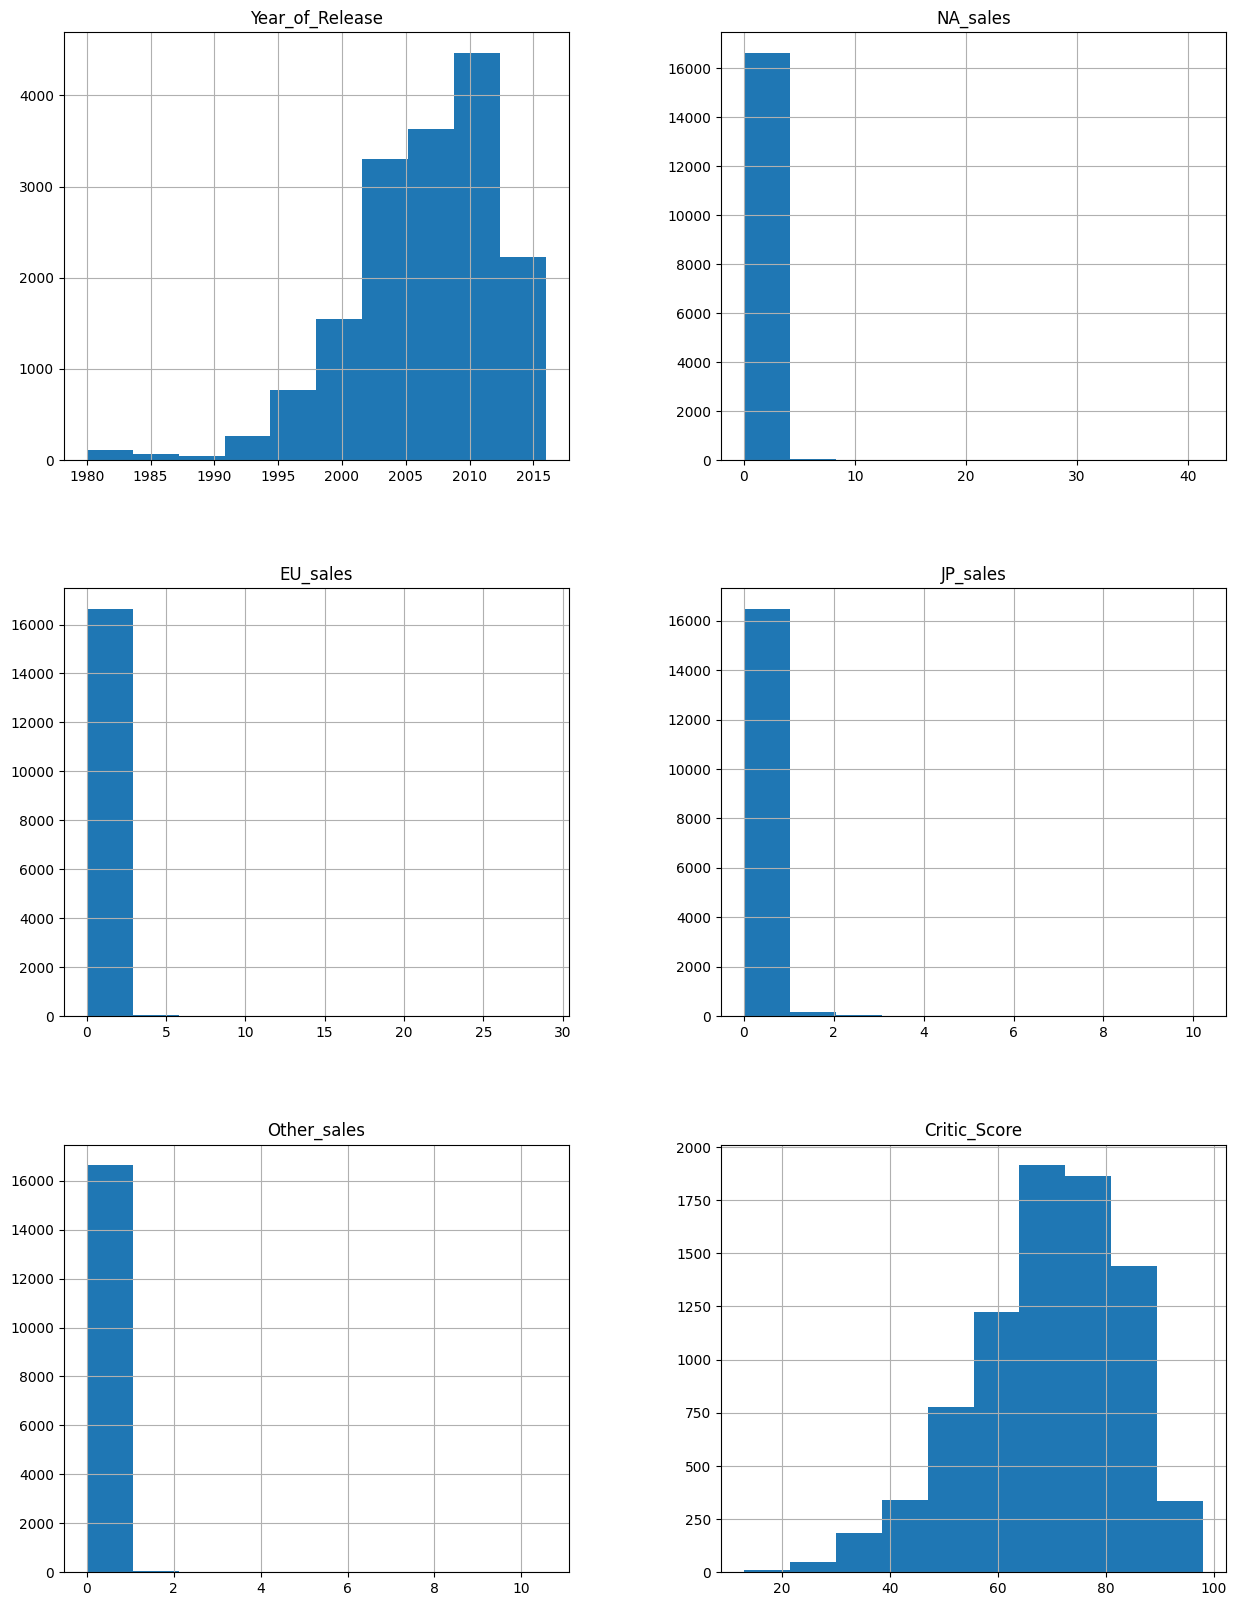

In [5]:
games.hist(figsize=(15, 20));

**Вывод. Таблица содержит 16715 строк, в столбцах присутствуют пропуски. Причина пропусков - вероятно отсутствие рейтингов и оценок у игр с небольшим объемом продаж. Нет единого стиля в наименовании столбцов. Некоторые столбцы имеют некорректный тип данных. На этапе предобработки данных нам следует:**
- привести наименования столбцов к нижнему регистру;
- проанализировать пропуски (столбцы `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`) и, если это возможно,- заполнить их данными;
- заменить формат столбца `Year_of_Release` с `float` на `int` (этого достаточно, поскольку нам важен только год), `User_Score` c `object` на `float`.

## Подготовьте данные. 

**2.1. Переименуем столбцы, чтобы все названия были в змеином регистре.**

In [6]:
games.rename(columns={'Name' : 'name'}, inplace=True)
games.rename(columns={'Platform' : 'platform'}, inplace=True)
games.rename(columns={'Year_of_Release' : 'year_of_release'}, inplace=True)
games.rename(columns={'Genre' : 'genre'}, inplace=True)
games.rename(columns={'NA_sales' : 'na_sales'}, inplace=True)
games.rename(columns={'EU_sales' : 'eu_sales'}, inplace=True)
games.rename(columns={'JP_sales' : 'jp_sales'}, inplace=True)
games.rename(columns={'Other_sales' : 'other_sales'}, inplace=True)
games.rename(columns={'Critic_Score' : 'critic_score'}, inplace=True)
games.rename(columns={'User_Score' : 'user_score'}, inplace=True)
games.rename(columns={'Rating' : 'rating'}, inplace=True)

**2.2. Обработаем и удалим пропуски.**

**Для начала нужно изучить пропуски. Выведем количество пропущенных значений для каждого столбца. Используем комбинацию двух методов `isna()` и `sum()`.**

In [7]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Посмотрим долю пропусков, и на основании этого примем решение об удалении, замене или игнорировании пропусков.**

In [8]:
pd.DataFrame(round(games.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


**Критически много пропусков в столбце `critic_score`, а также `user_score` и `rating`. При обработке пропусков в этих столбцах нам необходимо будет заполнить их или оставить без изменений, если логической замены пропуска не найдется. В столбцax `year_of_release`, `name` и `genre` доля пропуском составляет менее 5%, поэтому при обработке данных мы можем удалить строки с пропущенными значениями.**

**Приступим к  обработке. Мы видим, что незначительное количество значений пропущено в столбцах `year_of_release`,`name` и `genre` поэтому удаление строк с пропусками не сильно повлияет на данные в целом. Удалим записи, где отсутствует год выпуска игры, название и жанр с помощью метода `dropna()`.**

In [9]:
games.dropna(subset=['year_of_release'], inplace=True)
games.dropna(subset=['name'], inplace=True)
games.dropna(subset=['genre'], inplace=True)

**В столбце с рейтингом игры заменим пропуски на значение 'without_rating'.**

In [10]:
games['rating'] = games['rating'].fillna('without rating')

**По столбцам `critic_score` и `user_score` логичную замену предложить невозможно, поэтому оставим эти значения пустыми.**

**Проверим в каких столбцах остались пропущенные значения.**

In [11]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

In [12]:
games.reset_index(drop= True , inplace= True )

**2.3. Преобразуем тип данных.**

**Приведём к целочисленному типу столбец `year_of_release`.**

In [13]:
games['year_of_release'] = games['year_of_release'].astype(int)

**У столбца `user_score` тип данных `object`, нам следует посмотреть уникальные значения этого столбца.**

In [14]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Среди оценок пользователей мы видим значение 'tbd', эта аббревиатура обозначает 'To Be Determined' и переводится как 'будет определена'. Поскольку значение 'tbd' не означает наличие оценки пользователя, заменим ее на пропуск 'nan', пропуски оставим незаполненными, чтобы впоследствии не исказить данные.**

In [15]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('nan')

**Теперь мы можем преобразовать столбец `user_score` в тип `float`.**

In [16]:
games['user_score'] = games['user_score'].astype(float)

**Проверим все ли типы данных соответствуют значениям в столбцах.**

In [17]:
games.info()
games.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,without rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,without rating
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,without rating
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,without rating


**2.4. Обработаем дубликаты.**

**Выведем на экран количество явных дубликатов в данных. Если такие строки присутствуют, удалим их.**

In [18]:
games.duplicated().sum()

0

**2.5. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales`.**

In [19]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

## Проведите исследовательский анализ данных. 

**3.1. Посмотрим, сколько игр выпускалось в разные годы. Для этого сгруппируем игры по годам с помощью метода `groupby` и применим к группам функцию `count`. Сохраним таблицу в отдельную переменную `games_years`.**

In [20]:
games_years = games.groupby('year_of_release')[['name']].agg('count').reset_index()
games_years.columns = ['year_of_release', 'count_of_games']
games_years

,year_of_release,count_of_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


**Визуализируем получившуюся таблицу с помощью функции `plot()`.**

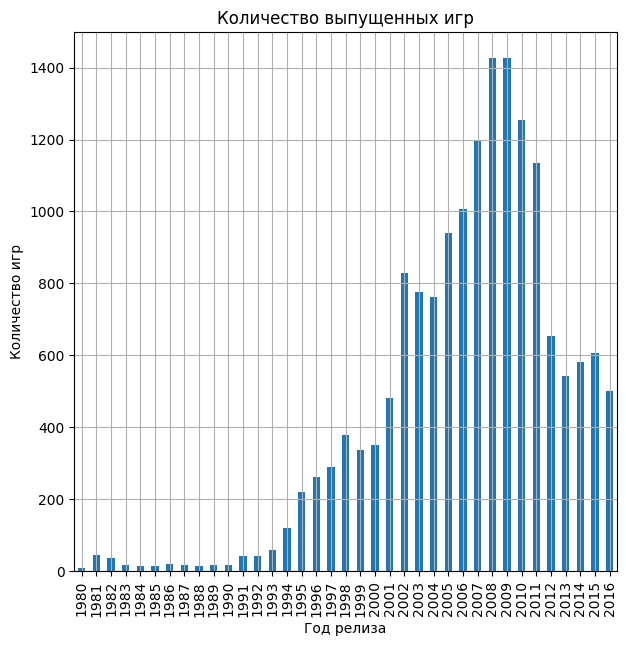

In [21]:
games_years.plot(
    kind = 'bar',
    x = 'year_of_release', 
    y = 'count_of_games',
    xlabel='Год релиза',
    ylabel='Количество игр',
    grid=True, 
    legend=None,
    title='Количество выпущенных игр',
    figsize=(7,7));

**Вывод. Как видно из диаграммы, количество выпущенных игр до 1990 года было незначительным. В 90-е годы количество выпускаемых игр стало расти и достигло своего максимума в 2008-2009 году, затем мы наблюдаем количественный спад.**

**Данные до 90-х годов несущественны для анализа, поскольку занимают крайне малую часть от последующих данных, поэтому мы не будем использовать их для исследования. Сделаем срез данных с 1991 года до 2016 года с помощью метода `query`.**

In [22]:
games_unique = games['name'].unique()

**3.2. Посмотрим, как менялись продажи по платформам в разные годы. Для начала найдем платформы с наибольшими суммарными продажами. Для этого сгруппируем игры по платформам с помощью метода `groupby` и применим к группам функцию `sum`. Сохраним таблицу в отдельную переменную `total_sales_platform`.**

In [23]:
total_sales_platform = games.groupby('platform')[['total_sales']].agg('sum').reset_index().sort_values(by='total_sales', ascending=False)

**Визуализируем получившуюся таблицу с помощью функции `plot()`.**

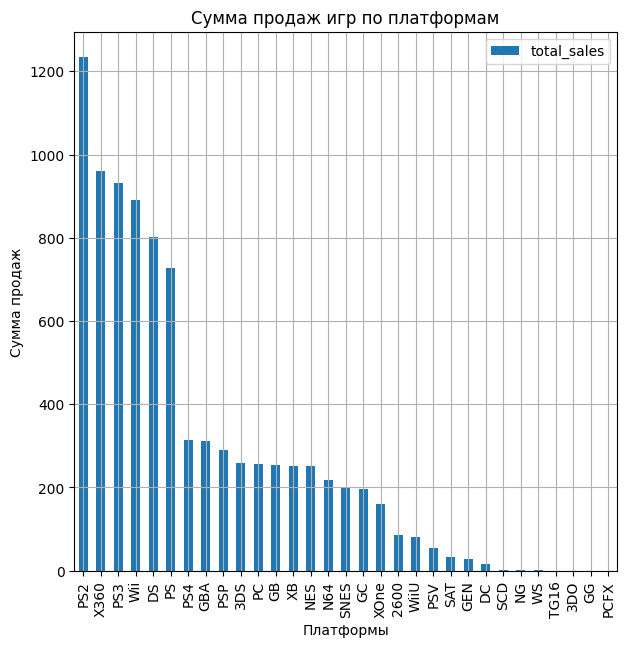

In [24]:
total_sales_platform.plot(
    kind = 'bar',
    x = 'platform', 
    y = 'total_sales',
    xlabel='Платформы',
    ylabel='Сумма продаж',
    grid=True, 
    title='Сумма продаж игр по платформам',
    figsize=(7,7));

**На графике видно, что в топ платформ по сумме продаж входят следующие 6 платформ: PS2, X360, PS3, Wii, DS, PS. Теперь посмотрим динамику продаж по годам в каждой из топовых платформ. Начнём с PS2, сделаем логический срез с помощью метода `loc`, так мы выберем из датафрейма все строки с данными по платформе PS2. Далее сгруппируем игры по годам релиза с помощью метода groupby и применим к группам функцию `sum`. Сохраним таблицу в отдельную переменную PS2.**

In [25]:
PS2 = games.loc[games['platform'] == 'PS2'].groupby('year_of_release')[['total_sales']].agg('sum').reset_index()
PS2

,year_of_release,total_sales
0,2000,39.17
1,2001,166.43
2,2002,205.38
3,2003,184.31
4,2004,211.81
5,2005,160.66
6,2006,103.42
7,2007,75.99
8,2008,53.90
9,2009,26.40


**Визуализируем таблицу с помощью функции `plot()`.**

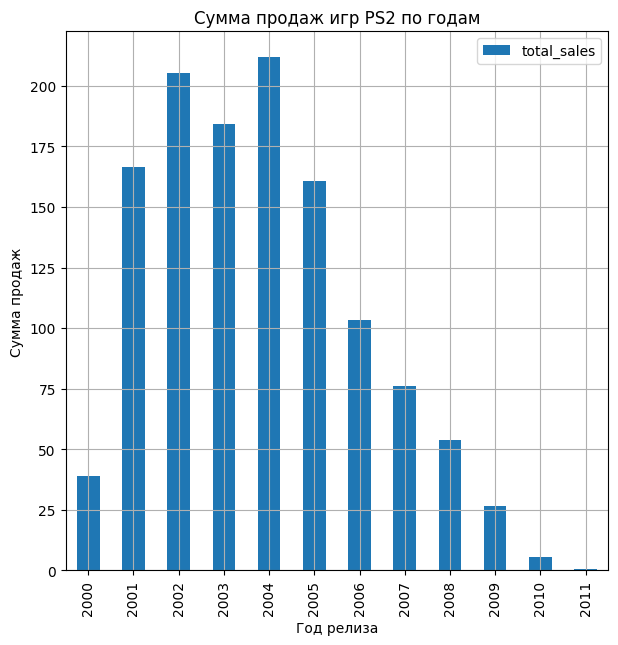

In [26]:
PS2.plot(
    kind = 'bar',
    x = 'year_of_release', 
    y = 'total_sales',
    xlabel='Год релиза',
    ylabel='Сумма продаж',
    grid=True, 
    title='Сумма продаж игр PS2 по годам',
    figsize=(7,7));

**PS2 - абсолютный лидер по объемам продаж. Игры платформы стали популярны через год после появления, пик продаж пришелся на 2001-2005 годы, начиная с 2006 года мы видим спад продаж.**

**Далее посмотрим динамику продаж игр X360 по годам.**

In [27]:
X360 = games.loc[games['platform'] == 'X360'].groupby('year_of_release')[['total_sales']].agg('sum').reset_index()
X360

,year_of_release,total_sales
0,2005,8.25
1,2006,51.62
2,2007,95.41
3,2008,135.26
4,2009,120.29
5,2010,170.03
6,2011,143.84
7,2012,99.74
8,2013,88.58
9,2014,34.74


**Визуализируем таблицу с помощью функции `plot()`.**

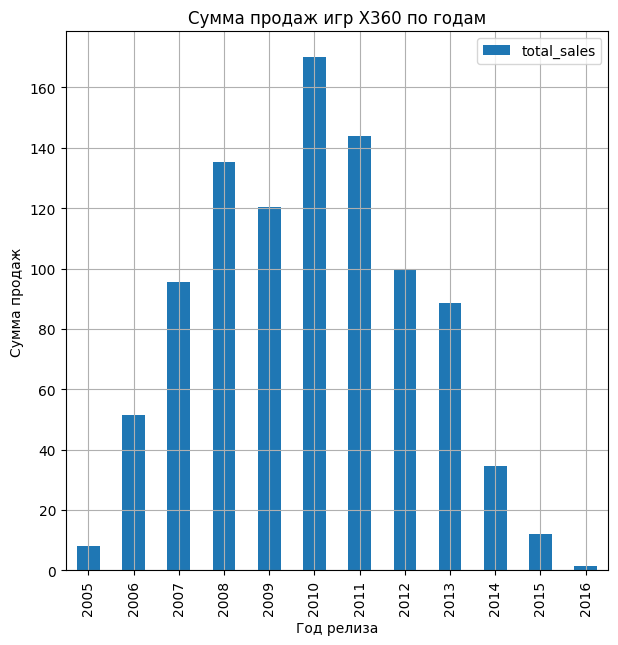

In [28]:
X360.plot(
    kind = 'bar',
    x = 'year_of_release', 
    y = 'total_sales',
    xlabel='Год релиза',
    ylabel='Сумма продаж',
    grid=True, 
    title='Сумма продаж игр X360 по годам',
    figsize=(7,7));

**Игры платформы X360 стали популярны через 2 года после появления, пик продаж пришелся на 2007-2012 годы, начиная с 2013 года мы видим спад продаж.**

**Далее посмотрим динамику продаж игр PS3 по годам.**

In [29]:
PS3 = games.loc[games['platform'] == 'PS3'].groupby('year_of_release')[['total_sales']].agg('sum').reset_index()
PS3

,year_of_release,total_sales
0,2006,20.96
1,2007,73.19
2,2008,118.52
3,2009,130.93
4,2010,142.17
5,2011,156.78
6,2012,107.36
7,2013,113.25
8,2014,47.76
9,2015,16.82


**Визуализируем таблицу с помощью функции `plot()`.**

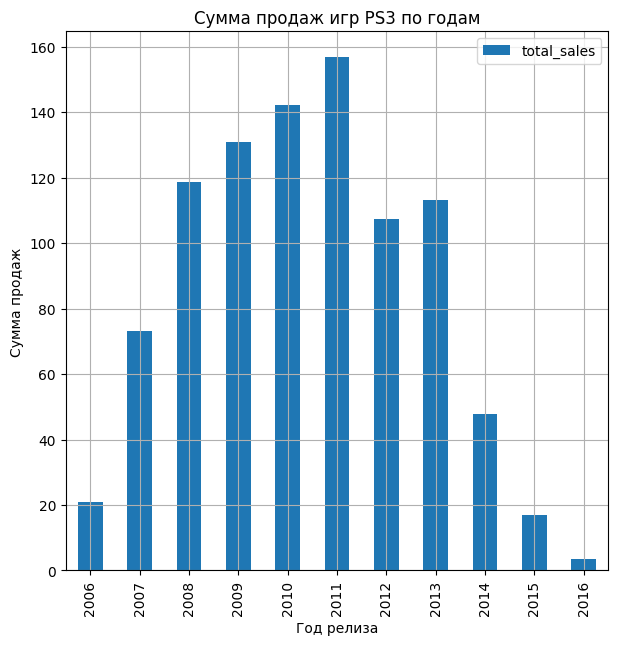

In [30]:
PS3.plot(
    kind = 'bar',
    x = 'year_of_release', 
    y = 'total_sales',
    xlabel='Год релиза',
    ylabel='Сумма продаж',
    grid=True, 
    title='Сумма продаж игр PS3 по годам',
    figsize=(7,7));

**Игры платформы PS3 стали популярны через год после появления, пик продаж пришелся на 2008-2013 годы, начиная с 2014 года мы видим резкий спад продаж.**

**Далее посмотрим динамику продаж игр Wii по годам.**

In [31]:
Wii = games.loc[games['platform'] == 'Wii'].groupby('year_of_release')[['total_sales']].agg('sum').reset_index()
Wii

,year_of_release,total_sales
0,2006,137.15
1,2007,152.77
2,2008,171.32
3,2009,206.97
4,2010,127.95
5,2011,59.65
6,2012,21.71
7,2013,8.59
8,2014,3.75
9,2015,1.14


**Визуализируем таблицу с помощью функции `plot()`.**

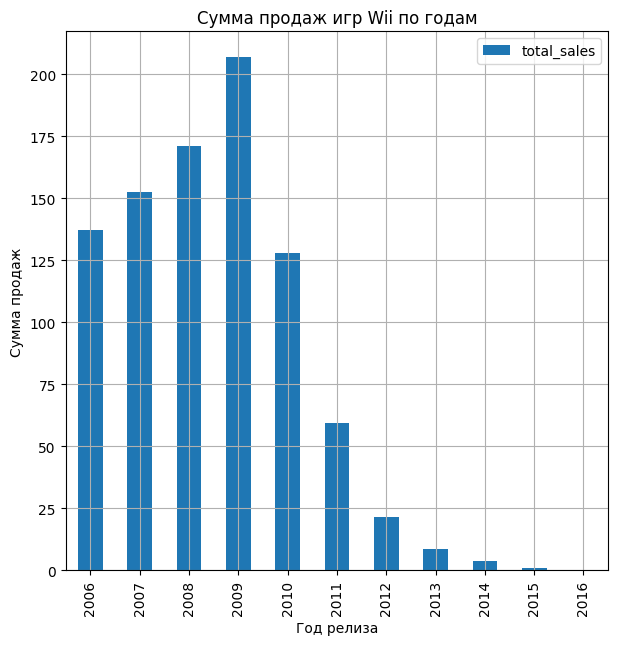

In [32]:
Wii.plot(
    kind = 'bar',
    x = 'year_of_release', 
    y = 'total_sales',
    xlabel='Год релиза',
    ylabel='Сумма продаж',
    grid=True, 
    title='Сумма продаж игр Wii по годам',
    figsize=(7,7));

**Игры платформы Wii стали популярны сразу же в первый год релиза, пик продаж пришелся на 2006-2010 годы, начиная с 2011 года мы видим резкий спад продаж.**

**Далее посмотрим динамику продаж игр DS по годам.**

In [33]:
DS = games.loc[games['platform'] == 'DS'].groupby('year_of_release')[['total_sales']].agg('sum').reset_index()
DS

,year_of_release,total_sales
0,1985,0.02
1,2004,17.27
2,2005,130.14
3,2006,119.81
4,2007,146.94
5,2008,145.31
6,2009,119.54
7,2010,85.02
8,2011,26.18
9,2012,11.01


**Визуализируем таблицу с помощью функции `plot()`.**

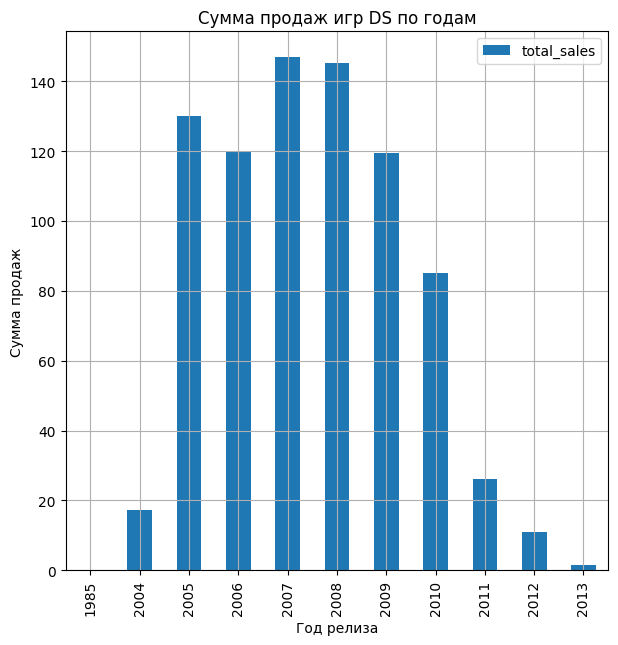

In [34]:
DS.plot(
    kind = 'bar',
    x = 'year_of_release', 
    y = 'total_sales',
    xlabel='Год релиза',
    ylabel='Сумма продаж',
    grid=True, 
    title='Сумма продаж игр DS по годам',
    figsize=(7,7));

**Игры платформы DS стали популярны через год после появления, пик продаж пришелся на 2005-2019 годы, начиная с 2010 года мы видим постепенный спад продаж.**

**Далее посмотрим динамику продаж игр PS по годам.**

In [35]:
PS = games.loc[games['platform'] == 'PS'].groupby('year_of_release')[['total_sales']].agg('sum').reset_index()
PS

,year_of_release,total_sales
0,1994,6.03
1,1995,35.96
2,1996,94.70
3,1997,136.17
4,1998,169.49
5,1999,144.53
6,2000,96.37
7,2001,35.59
8,2002,6.67
9,2003,2.07


**Визуализируем таблицу с помощью функции `plot()`.**

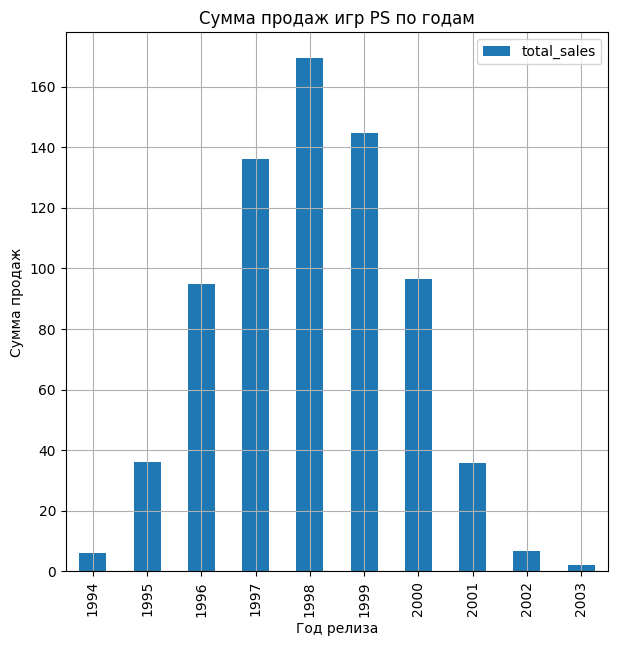

In [36]:
PS.plot(
    kind = 'bar',
    x = 'year_of_release', 
    y = 'total_sales',
    xlabel='Год релиза',
    ylabel='Сумма продаж',
    grid=True, 
    title='Сумма продаж игр PS по годам',
    figsize=(7,7));

**Игры платформы PS стали популярны через 2 года после появления, пик продаж пришелся на 1996-2000 годы, начиная с 2001 года мы видим резкий спад продаж.**

**Вывод. Мы видим, что полный цикл жизни платформы составляет в среднем 11 лет. Также существует закономерность - резкий всплеск продаж в среднем через год после появления платформы, 5-6 лет пика продаж, и спад, растянутый на 4-5 лет.**

**3.3. Определим актуальный период для построения прогноза на 2017 год.**

**Для прогноза перспективной платформы нужно понимать характер поведения платформы в процессе ее развития. Мы рассмотрели поведение 6 топовых платформ, а поведение менее успешных может оказаться иным: например, из-за отсутствия достаточного бюджета для её раскрутки хвост в начале графика будет длинее, а срок ее жизни будет меньше. Можно предположить, что топовая платформа может себе позволить дольше держаться на плаву и хвост справа на диаграмме у нее будет длиннее. Поскольку на рынке 30 платформ, то чтобы приблизиться к реальности, посчитаем средний срок жизни платформы исходя из всего набора данных.**

In [37]:
lifetime_of_platforms = [] # создаём пустой список, в который будем добавлять количество лет существования каждой платформы

for platform in games['platform'].unique(): # цикл совершает 30 итераций, добавляя в пустой список жизненый цикл каждой платформы
    lifetime_of_platforms.append(len(games.loc[games['platform'] == platform]['year_of_release'].unique()))
    
print('Среднее время жизни платформы', stat.mean(lifetime_of_platforms)) # находим среднее по списку, чтобы узнать средний жизненный цикл всех платформ

Среднее время жизни платформы 7.67741935483871


**Для целей прогнозирования продаж на следующий год в бизнесе берут данные в среднем за 2-3 года. Если взять слишком большой временной интервал, можно захватишь уже отжившие тренды. Исходя из полученного среднего срока жизни платформы в 7 лет, установим актуальный период в 5 лет - это максимально допустимый срок для прогнозирования. Актуальным периодом будет 2012-2016 годы, с учетом того, что данные за 2016 год неполные, мы практически будем анализировать 4,5 года. Сохраним данные за эти годы в отдельной переменной actual_time. Сделаем срез с помощью метода `query`.**

In [38]:
actual_time = games.query('year_of_release >= 2012')

**Вывод. В качестве актуального периода времени для прогноза мы взяли 2012-2016 годы.**

**3.4. Выявим платформы, лидирующие по продажам за актуальный период.**

**Посмотрим, какие платформы растут, а какие находятся в упадке. Для этого создадим сводную таблицу по данным за актуальный период, в которой в качестве строк будут годы этого периода, а в качестве столбцов названия платформ. Сама таблица содержит суммы продаж в каждой платформе по годам.**

In [39]:
total_sales_platform_actual_time = actual_time.pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
total_sales_platform_actual_time

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


**Визуализируем таблицу с помощью функции `plot()`.**

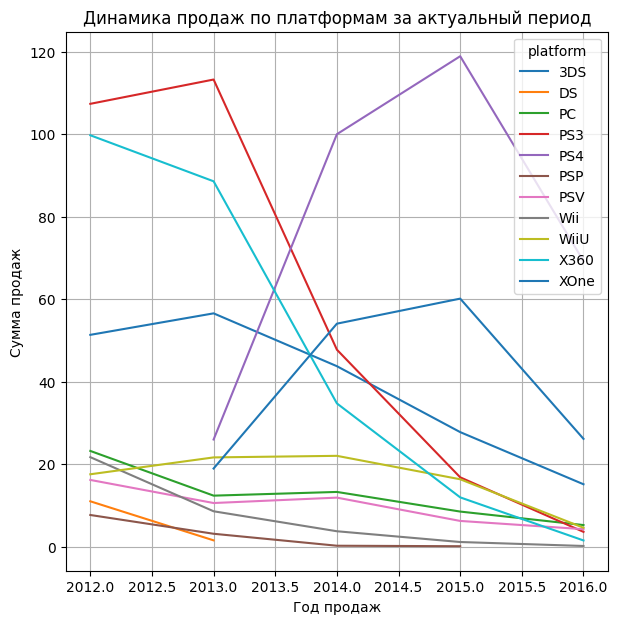

In [40]:
total_sales_platform_actual_time.plot(
    grid=True,
    figsize=(7, 7),
    title = 'Динамика продаж по платформам за актуальный период',
    xlabel = 'Год продаж',
    ylabel = 'Сумма продаж');

**Вывод. На графике видно, что такие платформы, как PSP и DS, перестали существовать к 2016 году. Основная часть платформ находятся на завершающем этапе своего жизненного цикла. Нам интересны 2 платформы: XOne и PS4. В актуальном периоде они самые молодые и существуют только 4 года, также находятся на пике продаж. На графике видно снижение продаж в 2016 году, что, вероятно, связано с тем, что у нас не полные данные за 2016 год. Поэтому эти платформы мы можем считать потенциально прибыльными.** 

**3.5. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

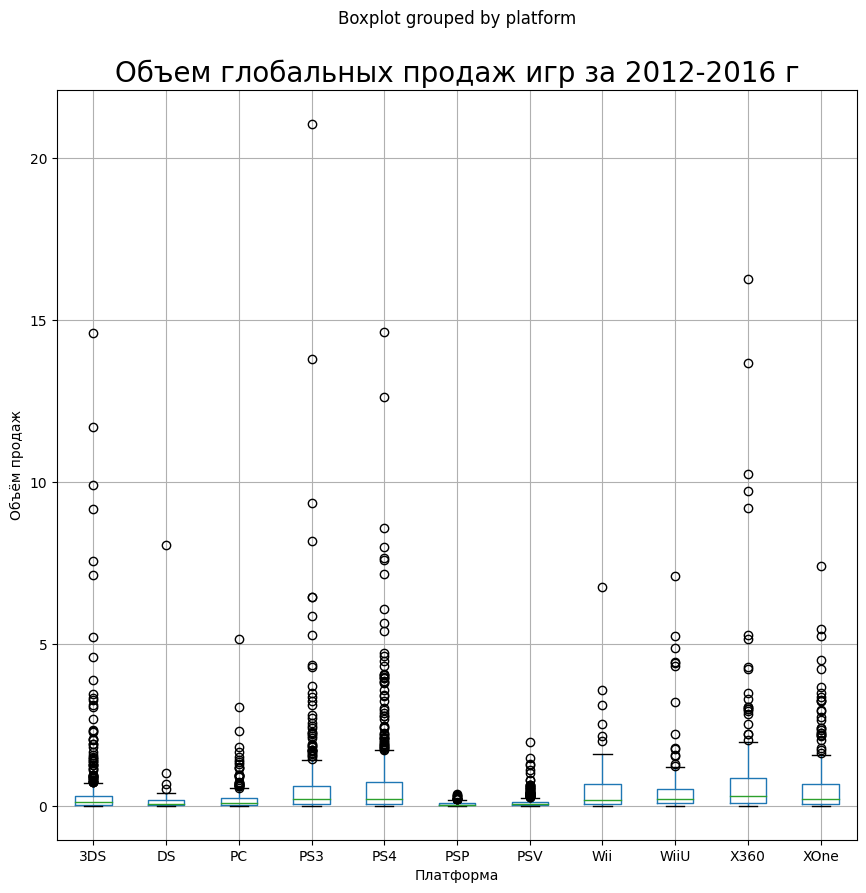

In [41]:
actual_time.boxplot(
    column='total_sales',
    by='platform',
    figsize=(10, 10))
plt.title('Объем глобальных продаж игр за 2012-2016 г', fontsize=20)
plt.xlabel('Платформа')
plt.ylabel('Объём продаж')
plt.show()

**Рассмотрим поближе область ящика.**

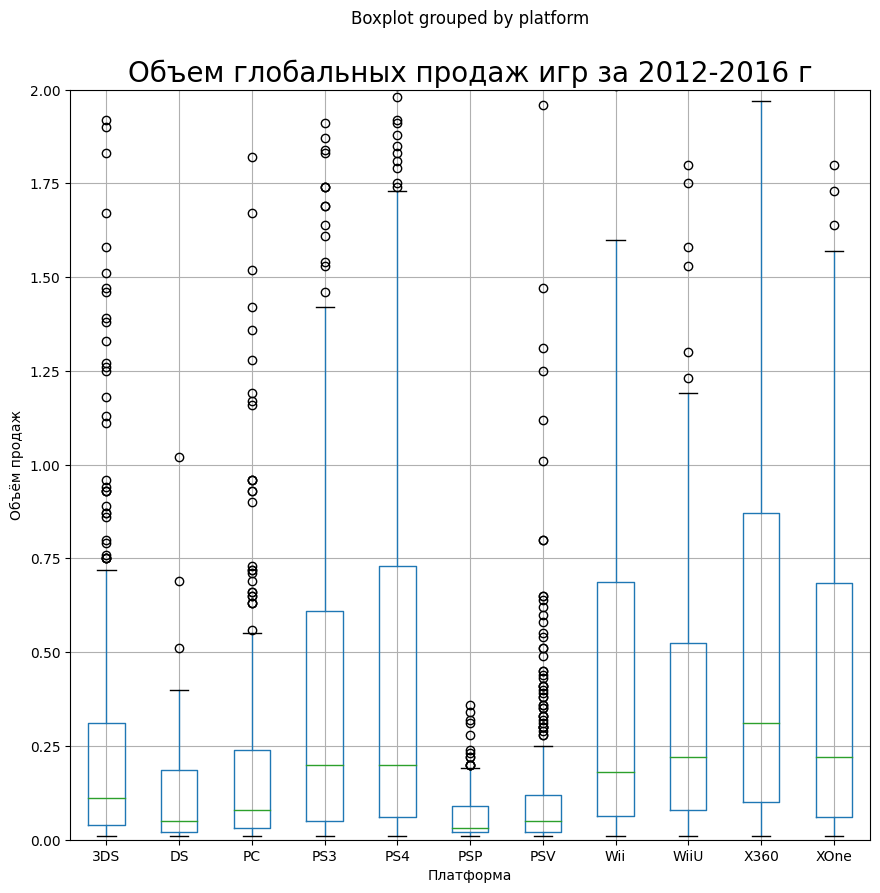

In [42]:
actual_time.boxplot(
    column='total_sales',
    by='platform',
    figsize=(10, 10))
plt.title('Объем глобальных продаж игр за 2012-2016 г', fontsize=20)
plt.xlabel('Платформа')
plt.ylabel('Объём продаж')
plt.ylim(0, 2)
plt.show()

**Вывод. Диаграмма размаха показывает распределение продаж по каждой платформе в 2012-2016 годы. Мы видим, что самое большое медианное значение и длинный "верхний" хвост у следующих платформ: Х360, PS3, PS4, XOne. Большая часть игр X360 продаётся в объёме до 2 млн. копий, 75% игр PS4 продаётся в объёме до 1,75 млн. копий. Медианный объём продаж игр этих платформ составляет около 370 тыс. копий и 200 тыс. копий соответственно. Медианный объём продаж игр платформы XOne составляет около 200 тыс. копий, 75% игр это платформы продаётся в объёме до 1,6 млн. копий.** 

**3.6. Рассмотрим влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.**

**Для анализа влияния отзывов на продажи возьмём платформу PS4. Для начала сделаем срез с данными только о платформе PS4 из актуального периода с помощью метода `query()`.**

In [43]:
actual_time_PS4 = actual_time.query('platform == "PS4"')

**Теперь построим диаграмму рассеяния для оценок пользователей с помощью функции `plot()`.**

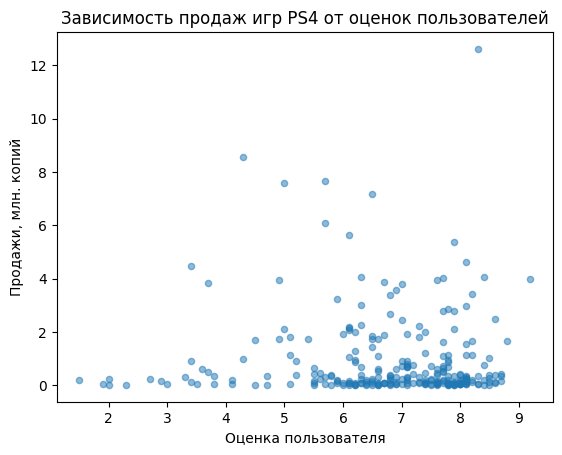

In [44]:
actual_time_PS4.plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
    alpha=0.5,
    title = 'Зависимость продаж игр PS4 от оценок пользователей',
    xlabel = 'Оценка пользователя',
    ylabel = 'Продажи, млн. копий');

**На диаграмме рассеяния видно, что плотность продаж выше в областях графика с высокой оценкой, и практически везде в этой части есть выбросы с продажами максимально большого количества копий. Но также следует отметить выбросы с высокими объёмами продаж (от 4 млн. копий) у игр с довольно низкой пользовательской оценкой (от 3,5 до 5 баллов).**

**По аналогии построим диаграмму рассеяния для оценок критиков с помощью функции `plot()`.**

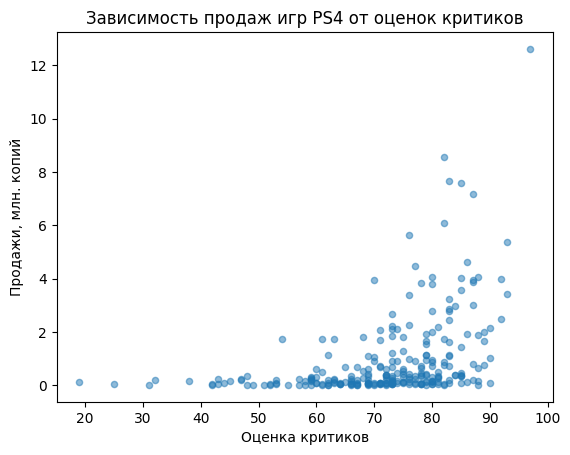

In [45]:
actual_time_PS4.plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
    alpha=0.5,
    title = 'Зависимость продаж игр PS4 от оценок критиков',
    xlabel = 'Оценка критиков',
    ylabel = 'Продажи, млн. копий');

**На диаграмме рассеяния видно, что плотность продаж выше в областях графика с высокой оценкой, и практически везде в этой части есть выбросы с продажами максимально большого количества копий. Также следует отметить, что игры с высокими объёмами продаж (от 4 млн. копий) имеют высокую оценку критиков от 70 баллов и выше. Это говорит о том, что оценка критиков больше влияет на объёмы продаж, чем оценка пользователей.**

**Чтобы убедиться в правдивости нашего вывода, посчитаем корреляцию между отзывами и продажами.**

In [46]:
print('Корреляция между отзывами пользователей и объёмом продаж:', actual_time_PS4['user_score'].corr(actual_time_PS4['total_sales'])) 

Корреляция между отзывами пользователей и объёмом продаж: -0.03195711020455643


In [47]:
print('Корреляция между отзывами пользователей и объёмом продаж:', actual_time_PS4['critic_score'].corr(actual_time_PS4['total_sales'])) 

Корреляция между отзывами пользователей и объёмом продаж: 0.4065679020617816


**Вывод. Между оценками пользователей и объёмами продаж зависимости не выявилось, коэффициент корреляции составил 0. Плюс на диаграмме рассеяния множество выбросов с большим объёмом продаж у игр с низким пользовательским рейтингом. Мы определили среднюю прямопропорциональную связь между оценками критиков и продажами. Коэффициент корреляции составил 0,4, а на диаграмме рассеяния ясно видно, что чем выше оценка критиков, тем больше объём продаж у значительной части игр.**

**3.7. Соотнесём выводы о платформе PS4 c объёмами продаж на других платформах.**

**Создадим список с платфорами из актуального периода, которые существуют на 2016 год. В списке не будет PS4.**

In [48]:
actual_platforms = ['3DS', 'PC', 'PS3', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

**Создадим цикл, который будет совершать итерации по нашему новому списку `actual_platforms`. Сначала построим в цикле диаграмму рассеяния для оценок пользователей, затем диаграмму рассеяния для оценок критиков, а потом посчитаем коэффициенты корреляции между отзывами и объёмами продаж.**

Корреляция между отзывами пользователей и объёмом продаж игр 3DS: 0.19758263411038596
Корреляция между отзывами критиков и объёмом продаж игр 3DS: 0.32080286953607845

Корреляция между отзывами пользователей и объёмом продаж игр PC: -0.12186747630735582
Корреляция между отзывами критиков и объёмом продаж игр PC: 0.2372432431156793

Корреляция между отзывами пользователей и объёмом продаж игр PS3: -0.005143522887113815
Корреляция между отзывами критиков и объёмом продаж игр PS3: 0.33149725926295887

Корреляция между отзывами пользователей и объёмом продаж игр PSV: -0.0043394375143148665
Корреляция между отзывами критиков и объёмом продаж игр PSV: 0.09448789929316172

Корреляция между отзывами пользователей и объёмом продаж игр Wii: 0.2961968000747953
Корреляция между отзывами критиков и объёмом продаж игр Wii: -0.4243413011077495

Корреляция между отзывами пользователей и объёмом продаж игр WiiU: 0.4002190202148617
Корреляция между отзывами критиков и объёмом продаж игр WiiU: 0.34837976

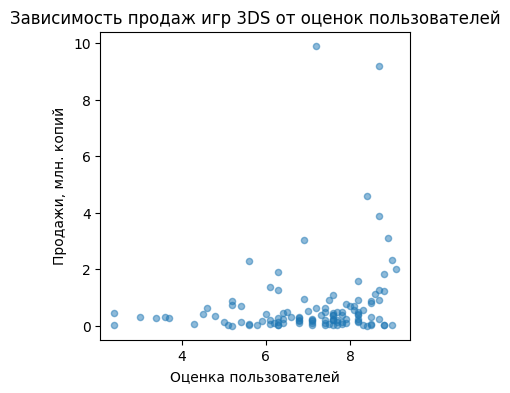

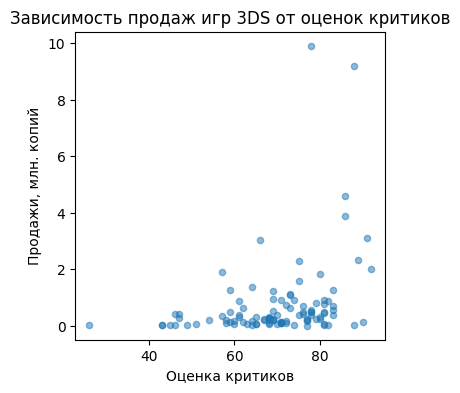

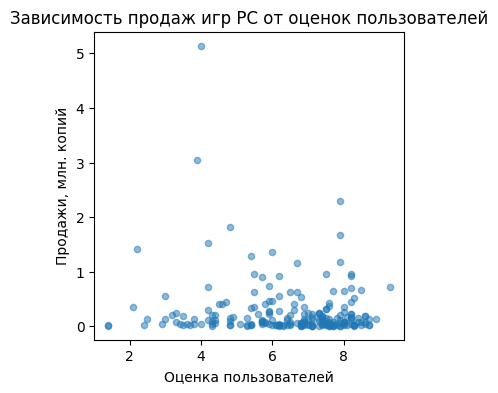

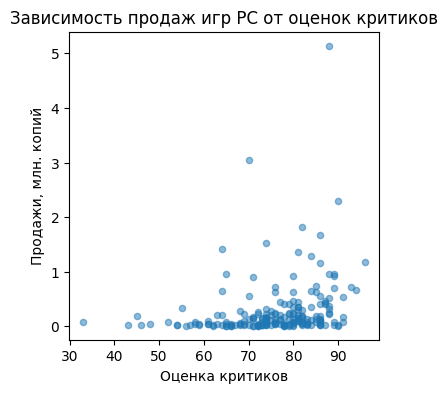

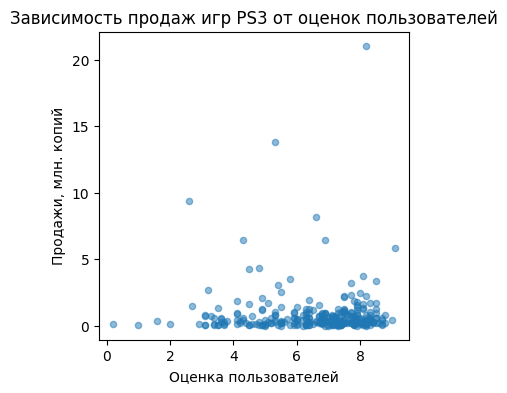

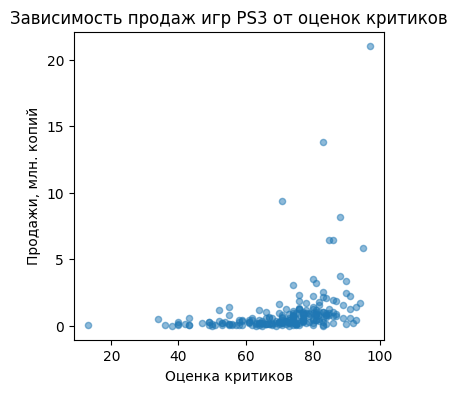

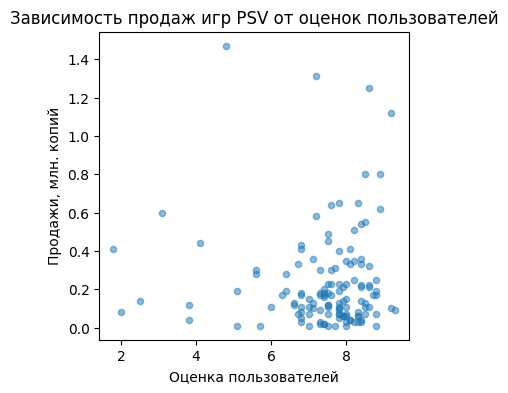

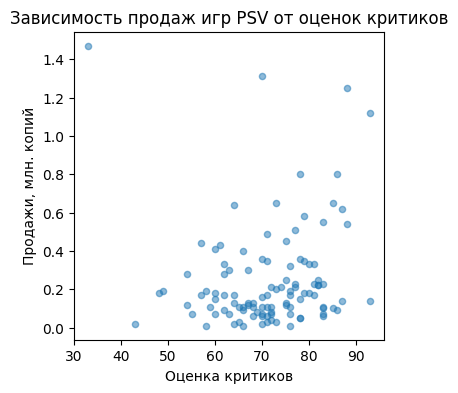

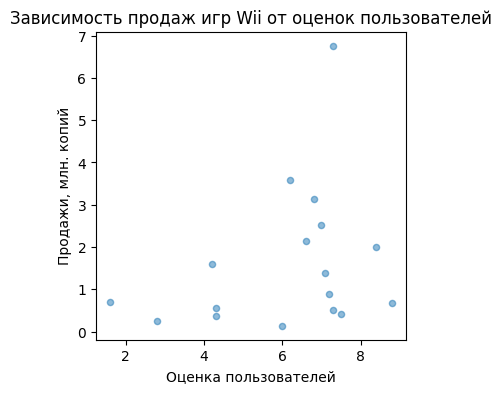

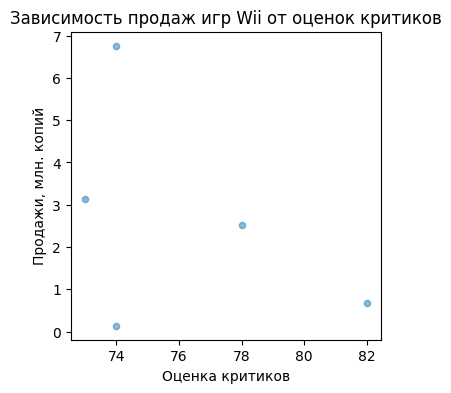

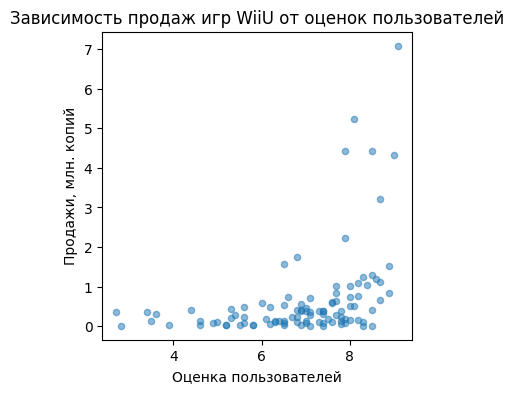

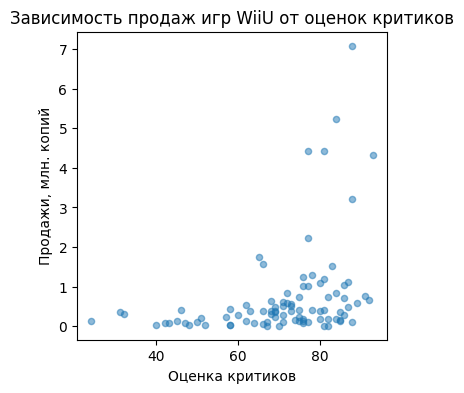

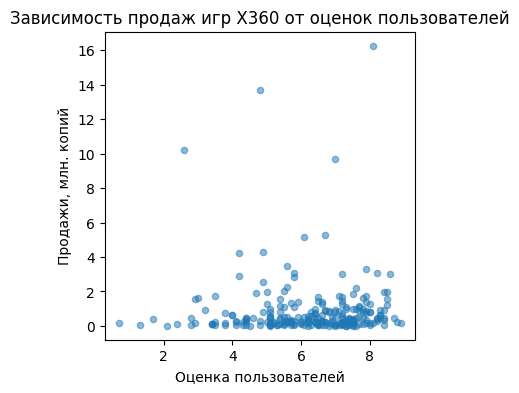

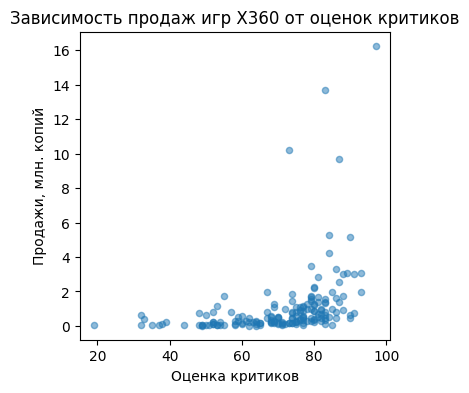

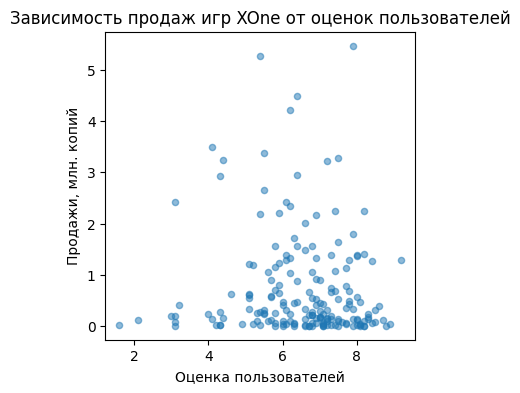

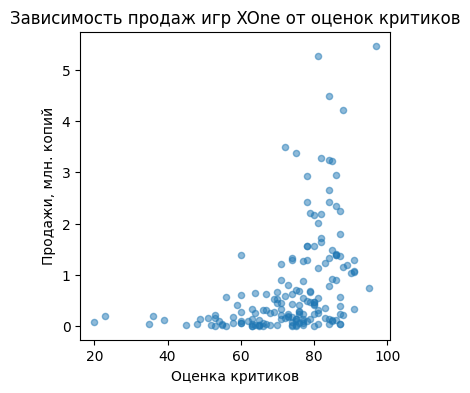

In [49]:
for platform in actual_platforms:
    actual_time.query('platform == @platform').plot(
        x='user_score',
        y='total_sales',
        kind='scatter',
        alpha=0.5,
        figsize=(4, 4),
        title = f'Зависимость продаж игр {platform} от оценок пользователей',
        xlabel = 'Оценка пользователей',
        ylabel = 'Продажи, млн. копий')
    
    actual_time.query('platform == @platform').plot(
        x='critic_score',
        y='total_sales',
        kind='scatter',
        alpha=0.5,
        figsize=(4, 4),
        title = f'Зависимость продаж игр {platform} от оценок критиков',
        xlabel = 'Оценка критиков',
        ylabel = 'Продажи, млн. копий')
    
    print(f'Корреляция между отзывами пользователей и объёмом продаж игр {platform}:', actual_time.query('platform == @platform')['total_sales'].corr(actual_time.query('platform == @platform')['user_score']))
    print(f'Корреляция между отзывами критиков и объёмом продаж игр {platform}:', actual_time.query('platform == @platform')['total_sales'].corr(actual_time.query('platform == @platform')['critic_score']))
    print()

**Вывод. У большинства платформ взаимосвязь аналогичная платформе PS4: между оценками пользователей и объёмами продаж зависимости не выявилось, коэффициент корреляции составил 0, либо прослеживается крайне слабая зависимость. Также на диаграммах рассеяния множество выбросов с большим объёмом продаж у игр с низким пользовательским рейтингом. Лишь одна платформа WiiU является исключением. Коэффициент корреляции между отзывами пользователей и продажами составил 0,4, что говорит о средней степени прямопропорциональной связи, на диаграмме рассеяния выбросы с большими объёмами продаж только у игр с высокой оценкой (от 8 баллов).** 

**Что касается оценок критиков, то у большинства платформ есть средняя и слабо-средняя связь между оценками критиков и объёмами продаж, так как коэффициенты корреляции составляют от 0,3 до 0,4. В качестве исключения выделим платформу PSV, здесь коэффициент корреляции составил 0,1, что говорит о крайне слабой взаимосвязи. На диаграмме рассеяния видно выброс с объёмом продаж около 1,5 млн. копий, но с крайне низким рейтингом от критиков (около 33 баллов из 100). Скорее всего этот выброс сильно влияет на снижение показателя корреляции.**

**Коэффициенты корреляции игр платформы Wii мы небудем анализировать, потому что на диаграмме рассеяния видно, что данных крайне мало.**

**3.8. Посмотрим на общее распределение игр по жанрам.**

**Для начала проанализирует объёмы продаж игр по жанрам. Сгруппируем игры по жанрам с помощью метода `groupby` и посчитаем сумму продаж в каждой группе. Запишем таблицу в переменную `genre_total_sales`.**

In [50]:
genre_total_sales = actual_time.groupby('genre')[['total_sales']].agg('sum').reset_index()
genre_total_sales

,genre,total_sales
0,Action,441.12
1,Adventure,29.43
2,Fighting,44.49
3,Misc,85.04
4,Platform,61.00
5,Puzzle,4.89
6,Racing,53.50
7,Role-Playing,192.80
8,Shooter,304.73
9,Simulation,35.12


**Визуализируем таблицу с помощью функции `plot()`. Построим круговую диаграмму, чтобы узнать долю игр каждого жанра на общем рынке.**

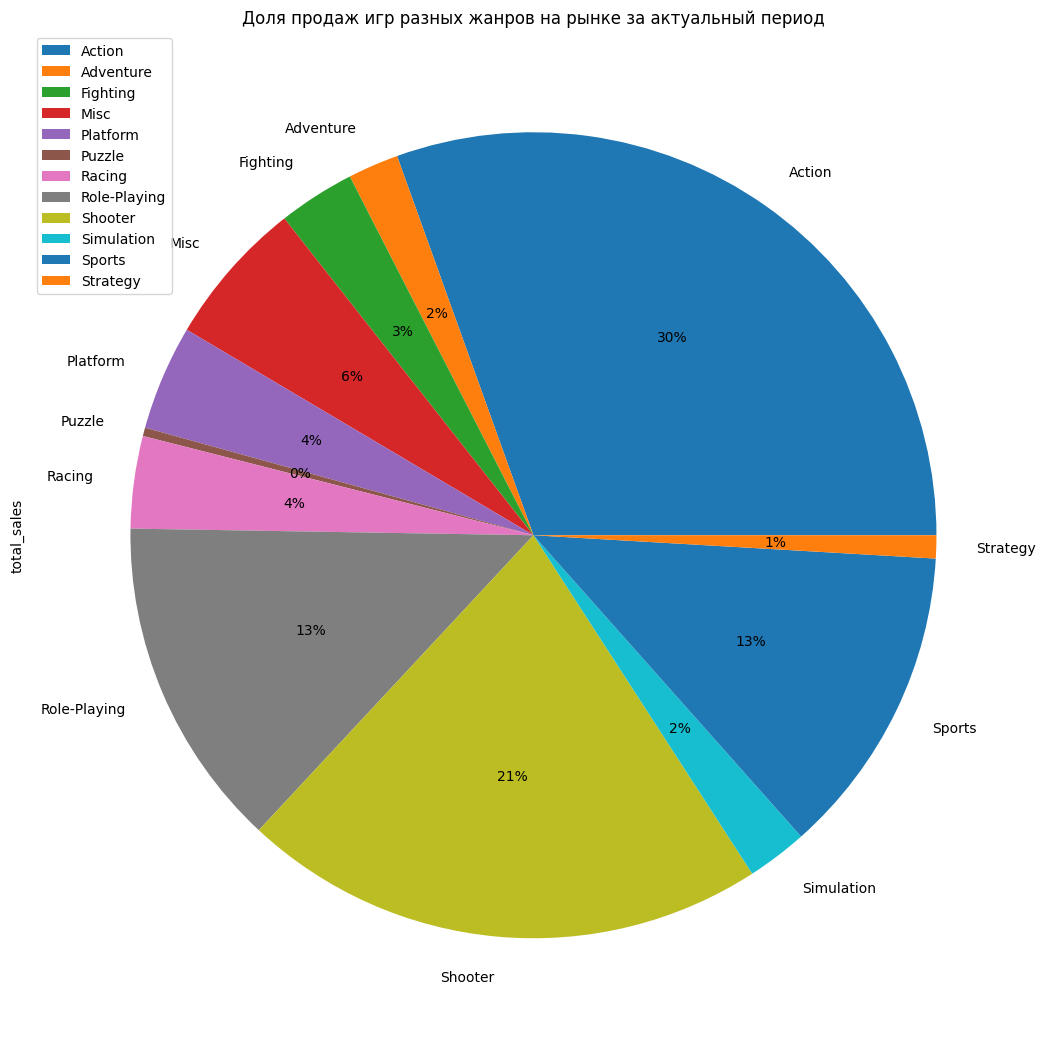

In [51]:
genre_total_sales.plot(
    kind='pie',
    y='total_sales',
    autopct='%1.0f%%', 
    title= 'Доля продаж игр разных жанров на рынке за актуальный период',
    labels = genre_total_sales['genre'],
    figsize=(13,15));

**Вывод. Наибольшую долю на рынке занимают игры в жанре Action - 30% и Shooter -21%. Самую маленькую долю на рынке занимают игры в жанре Puzzle - меньше 1%.**

**Построим сводную таблицу с помощью `pivot_table()`, чтобы посмотреть на сумму продаж в каждом году актуального периода в разбивке по жанрам. Сохраним таблицу в переменную genre_total_sales_years.**

In [52]:
genre_total_sales_years = actual_time.pivot_table(index='year_of_release', columns = 'genre', values = 'total_sales', aggfunc = 'sum')
genre_total_sales_years

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2012,119.25,5.79,9.18,22.22,18.37,1.72,13.61,46.91,71.75,13.36,30.42,3.26
2013,122.51,6.09,7.09,25.27,24.54,0.96,12.37,44.45,62.04,8.63,41.17,6.12
2014,97.23,5.57,15.85,23.38,8.81,1.49,16.66,45.62,65.21,5.58,45.15,0.98
2015,72.02,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85
2016,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.13


**Визуализируем таблицу с помощью функции `plot()`.**

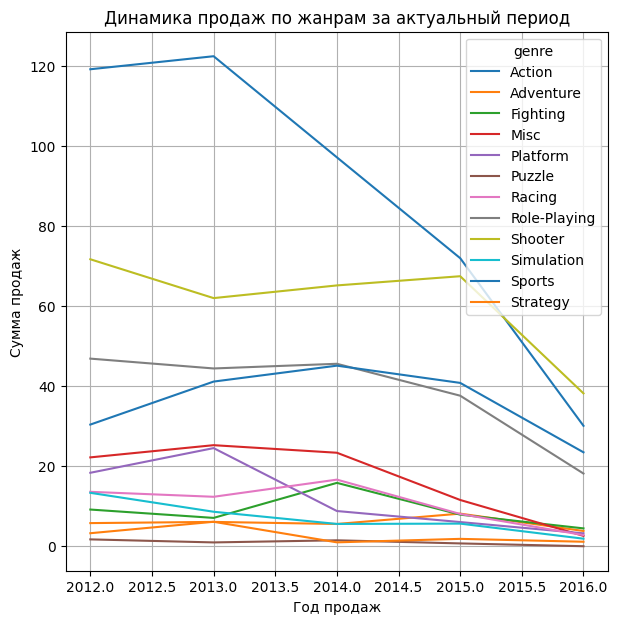

In [53]:
genre_total_sales_years.plot(
    grid=True,
    figsize=(7, 7),
    title = 'Динамика продаж по жанрам за актуальный период',
    xlabel = 'Год продаж',
    ylabel = 'Сумма продаж');

**Вывод. Анализируя график, мы будем учитавать то, что данные за 2016 год неполные.**

**Сумма продаж игр в жанре Action c 2012 года по 2015 год снизилась почти в 2 раза. Пиковое значение было в 2013 году и составляло 122,5 млн. копий. Игры в жанре Shooter намного стабильней в своих показателях. С 2012 года по 2015 год сумма продаж снизилась незначительно с 72 млн. до 67,5 млн. копий. При этом мы видим повышательный тренд с 2013 года, и, возможно, если бы у нас были полные данные за 2016 год, то к 2016 году сумма продаж могла сравняться с показателями 2012 года.**

**За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. поэтому следует найти жанры, где игры стабильно приносят высокий доход. Рассмотрим медианные продажи за актуальный период в каждом жанре. Построим график «ящик с усами» по глобальным продажам игр в разбивке по жанрам.**


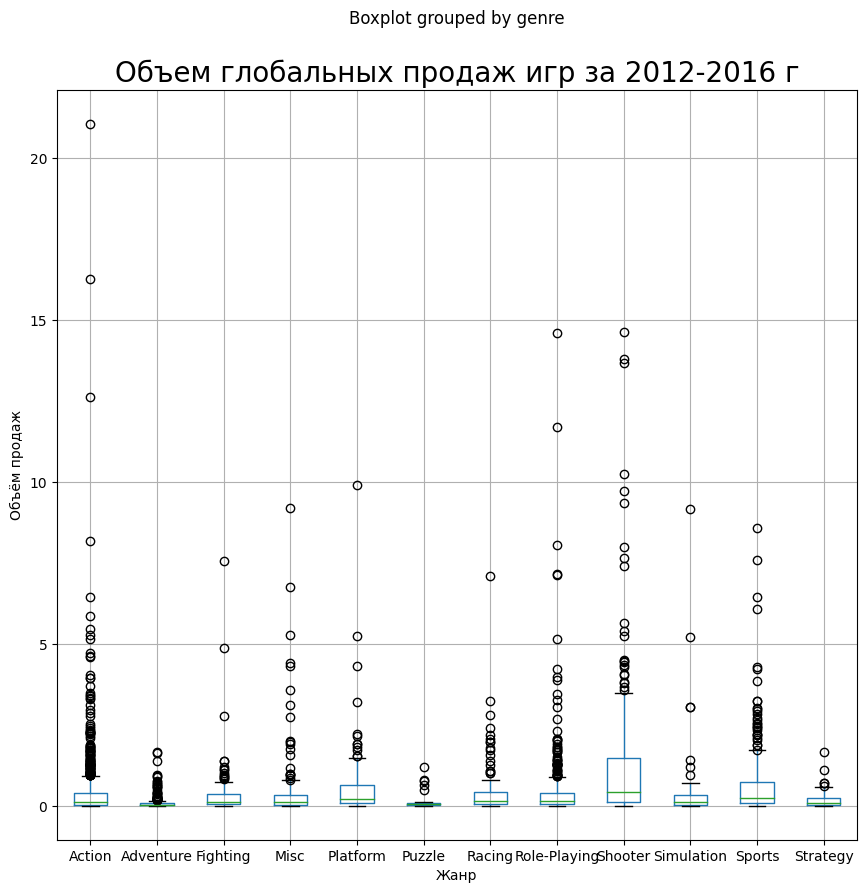

In [54]:
actual_time.boxplot(
    column='total_sales',
    by='genre',
    figsize=(10, 10))
plt.title('Объем глобальных продаж игр за 2012-2016 г', fontsize=20)
plt.xlabel('Жанр')
plt.ylabel('Объём продаж')
plt.show()

**Рассмотрим поближе область ящика.**

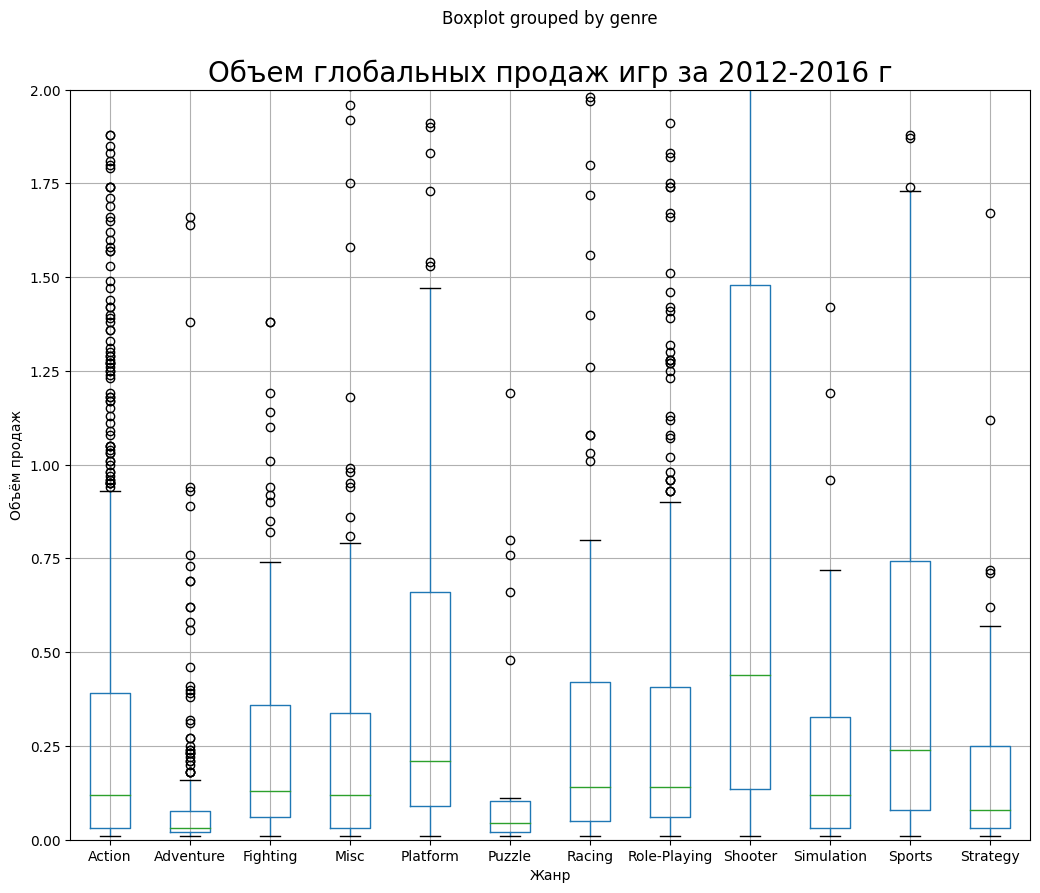

In [55]:
actual_time.boxplot( 
    column='total_sales',
    by='genre',
    figsize=(12, 10))
plt.title('Объем глобальных продаж игр за 2012-2016 г', fontsize=20)
plt.xlabel('Жанр')
plt.ylabel('Объём продаж')
plt.ylim(0,2)
plt.show()

**Вывод. Диаграмма размаха показала, что самую высокую долю на общем рынке жанр Action занимает благодаря нескольким играм с гигантским объёмом продаж. На самом деле, медианный объём продаж игр в жанре Action составляет около 125 тыс. копий, что является достаточно средним показателем среди всех жанров.**

**Самые высокие показатели прибыли у жанра Shooter, медианный объём продаж за актуальный период составляет около 450 тыс. копий. Плюс этот жанр имеет достаточно длинный "верхний хвост". Большая часть игр в жанре Shooter продается в объёме до 3,5 млн. копий.**

**Благодаря диаграмме размаха мы можем выделить ещё 2 лидирующих жанра: Sports и Platform. Медианные продажи этих жанров составляют, примерно, 250 тыс. копий и 200 тыс. копий соответственно. Также у этих жанров достаточно большой 3-ий квартиль.**

## Составьте портрет пользователя каждого региона. 

**4.1. Определим для пользователей каждого из 3-ёх основных регионов самые популярные платформы и опишим различия в долях продаж.**

**Для начала создадим словарь, в котором ключами будут названия регионов, а значениями показатель продаж.** 

In [56]:
regions = {'Северная Америка': 'na_sales', 'Европа': 'eu_sales', 'Япония': 'jp_sales'}

**Теперь напишем цикл, который визуализирует данные по каждому из 3-ёх регионов с помощью круговой диаграммы.**

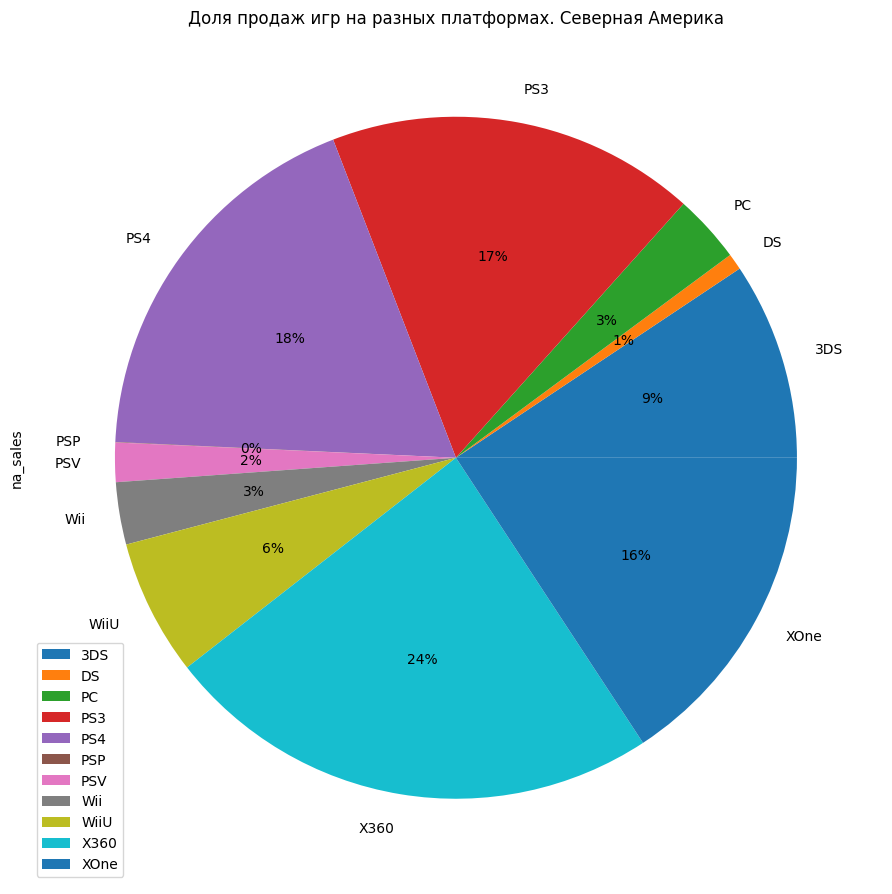

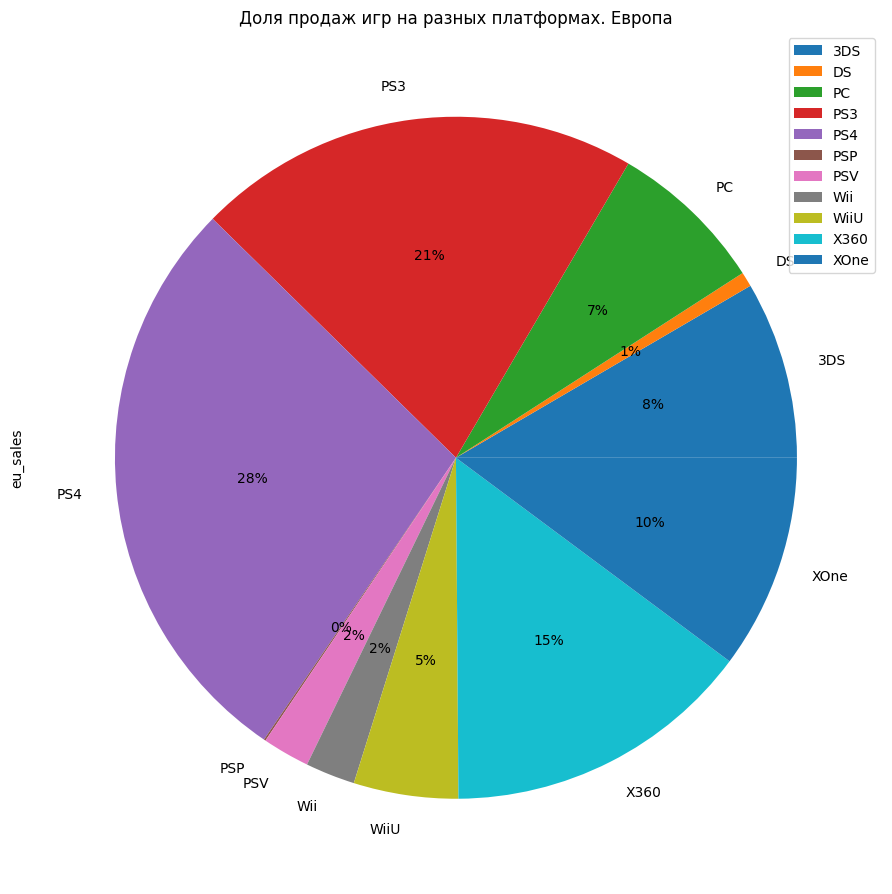

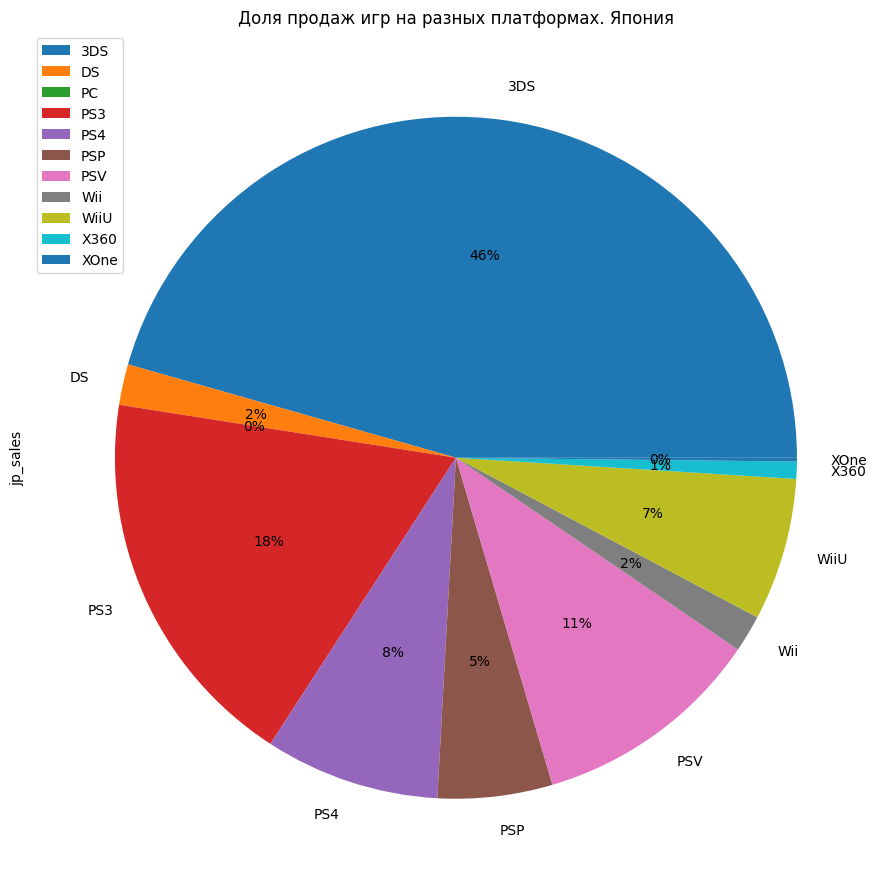

In [57]:
for region, sale in regions.items():
    df = actual_time.groupby('platform')[[sale]].agg('sum').reset_index() # создадим срез `df`, сгруппировав игры
    # по платформам с помощью метода `groupby`, и применим к группам функцию `sum`
    
    df.plot(
        kind='pie',
        y=sale,
        autopct='%1.0f%%', 
        title= f'Доля продаж игр на разных платформах. {region}',
        labels = df['platform'],
        figsize=(11,13));

**Вывод. В Северной Америке наиболее популярны игры платформ X360, они занимают четверть рынка. Также значительную долю общих продаж в Северной Америке занимают PS4, PS3, XOne и 3DS и составляют 18%, 17%, 16% и 9% соответственно.**

**В Европе почти половину рынка занимают игры платформ PS3 и PS4. Также значительную долю общих продаж в Европе занимают X360, XOne и 3DS и составляют 15%, 10% и 8% соответственно.**

**На рынке Японии самая популярная платформа 3DS, её доля составляет 46% от продаж. Далее по популярности находятся игры платформ PS3 - 18%. Также значительную долю общих продаж в Японии занимают PSV(11%), PS4(8%), WiiU(7%).**

**4.2. Определим для пользователей каждого из 3-ёх основных регионов самые популярные жанры и опишим различия в долях продаж.**

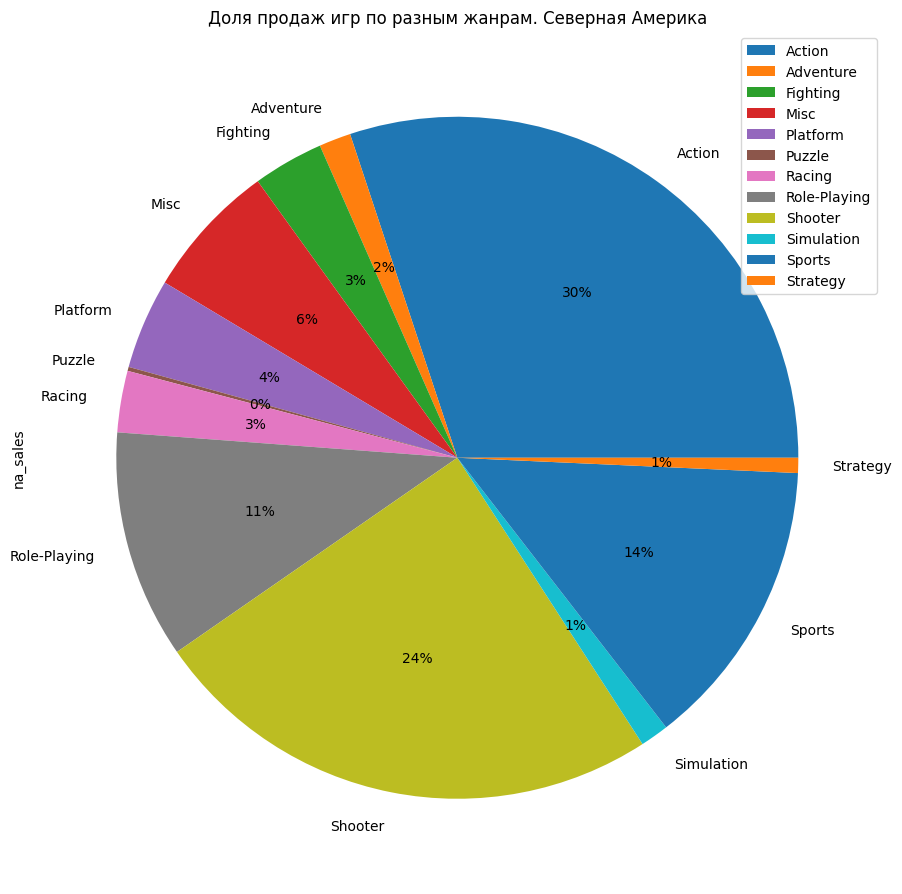

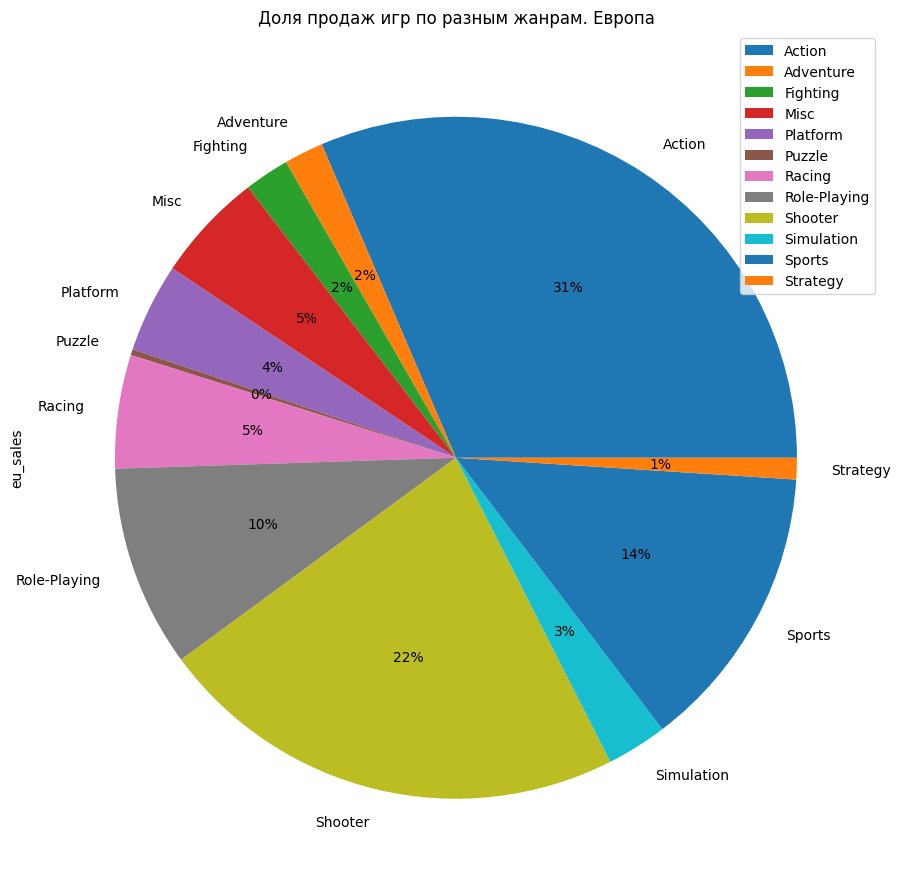

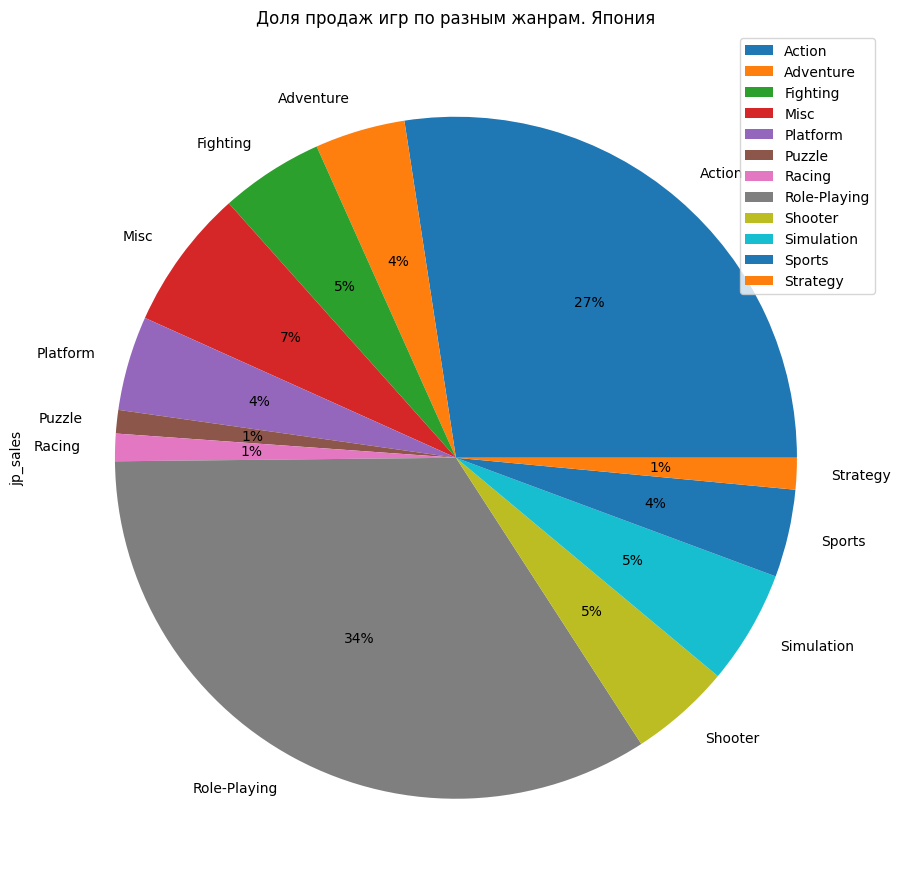

In [58]:
for region, sale in regions.items():
    df = actual_time.groupby('genre')[[sale]].agg('sum').reset_index() # создадим срез `df`, сгруппировав игры
    # по жанрам с помощью метода `groupby`, и применим к группам функцию `sum`
    
    df.plot(
        kind='pie',
        y=sale,
        autopct='%1.0f%%', 
        title= f'Доля продаж игр по разным жанрам. {region}',
        labels = df['genre'],
        figsize=(11,13));

**Вывод. В Северной Америке наиболее популярны жанры Action и Shooter, они занимают свыше половины рынка. Также значительную долю общих продаж в Северной Америке занимают жанры Sports, Role-Playing и Misc и составляют 14%, 11% и 6% соответственно.**

**На европейском рынке ситуация практически такая же с небольшой разницей в процентных соотношениях. Больше половины рынка занимают игры в жанре Action и Shooter. Также значительную долю общих продаж в Европе занимают жанры Sports и Role-Playing, они  составляют 14% и 10% соответственно. На пятом месте по популярности жанры Misc и Racing, по 5% каждый.**

**Японская аудитория имеет свои специфические отличия в жанрах, самый популярный жанр здесь Role-Playing, составляет 34% от продаж. Далее по популярности находятся игры в жанре Action - 27%. Эти 2 жанра занимают более 60% от общего рынка, а определить 3 других топовых жанра сложнее, потому что далее доли распределяются практически равномерно: Misc(7%), Shooter(5%), Fighting(5%) и Simulation(5%).**

**4.3. Определим влияние рейтинга ESRB на продажи в 3-ёх основных регионах и опишим различия.**

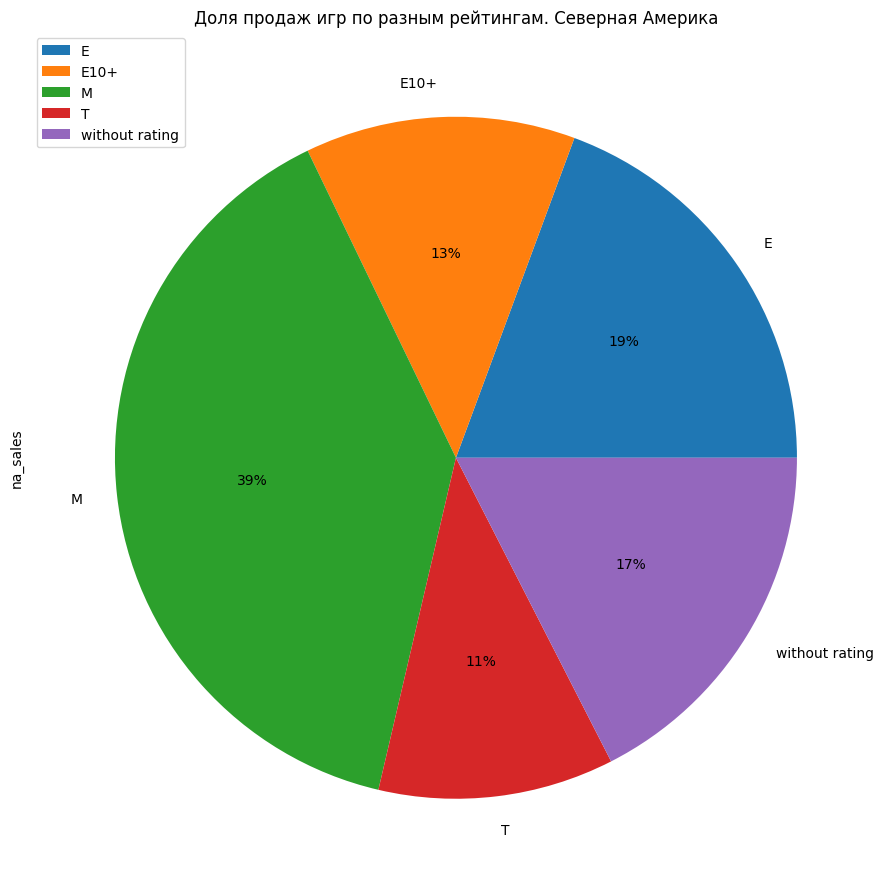

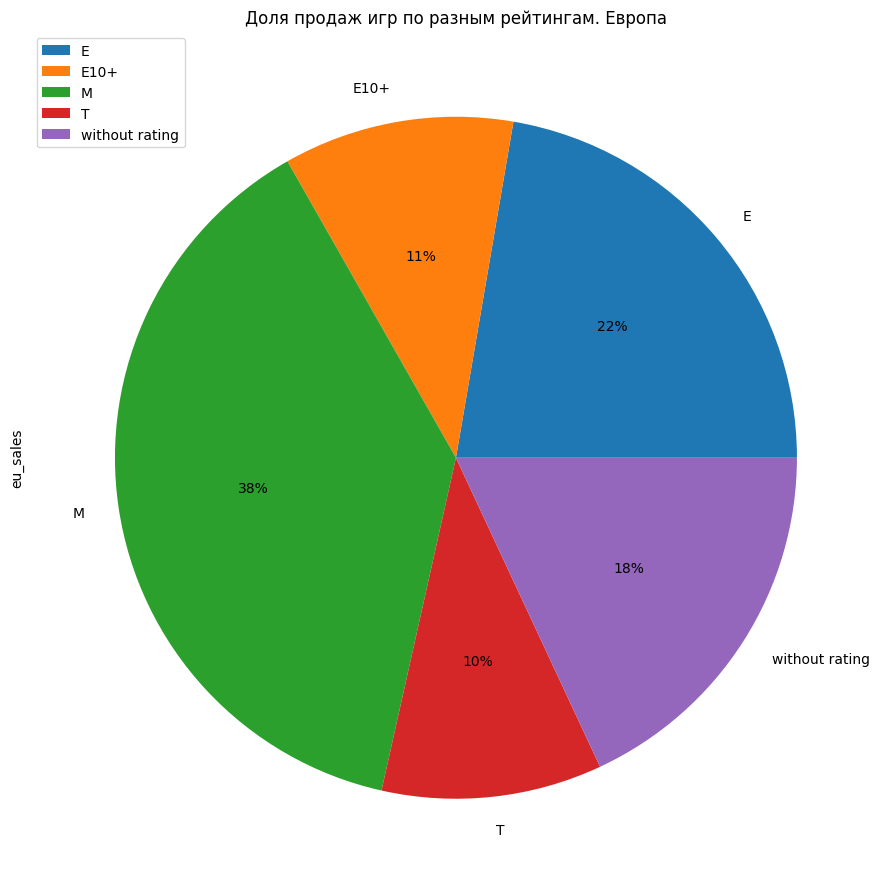

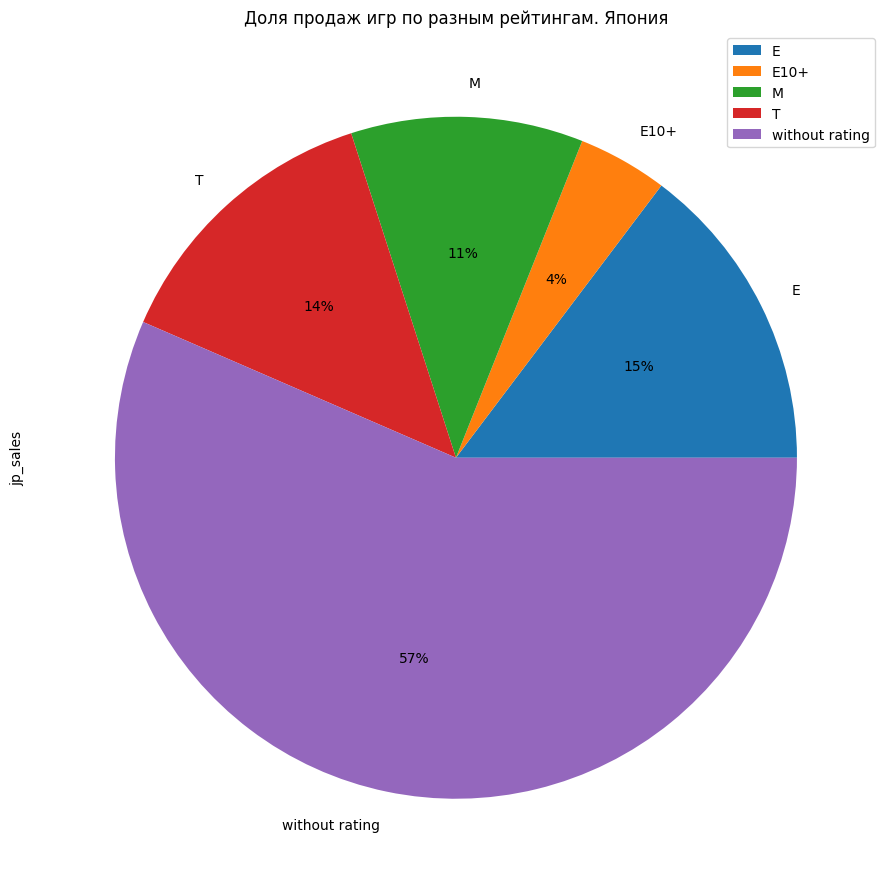

In [59]:
for region, sale in regions.items():
    df = actual_time.groupby('rating')[[sale]].agg('sum').reset_index() # создадим срез `df`, сгруппировав игры
    # по рейтингам с помощью метода `groupby`, и применим к группам функцию `sum`
    
    df.plot(
        kind='pie',
        y=sale,
        autopct='%1.0f%%', 
        title= f'Доля продаж игр по разным рейтингам. {region}',
        labels = df['rating'],
        figsize=(11,13));

**На диаграмме видно, что больше половины японского рынка занимают игры с неопределённым рейтингом - 57%. При анализе топовых платформ мы выявили, что на рынке Японии предпочитают в основном отечественные разработки: Sony(PS3, PSV, PS4) и Nintendo(3DS, WiiU). Скорее всего платформы выпускают значительное количество игра только на местный рынок, поэтому не определяют рейтинг для мирового рынка. Сделаем срез с помощью метода `query()`, чтобы посмотреть сумму продаж в Японии за актуальный период у игр с неопределённым рейтингов. Обязательным условием сделаем то, что в других регионах такие игры не имеют продаж вообще.**

In [60]:
actual_time.query('rating == "without rating" and na_sales == 0 and eu_sales == 0 and other_sales == 0 and jp_sales > 0')['jp_sales'].agg('sum')

68.30000000000001

**Найдём общую сумму продаж игр на японском рынке.**

In [61]:
actual_time['jp_sales'].sum()

192.58

**В результате мы видим, что свыше 35% от общих продаж в Японии занимают игры, выпущенные только на внутренний рынок. Этим обусловлена такая высокая доля игр с неопределенным рейтингом на японском рынке.**

**Вывод. Круговые диаграммы распределения долей игр по разным рейтингам в Европе и Северной Америке практически идентичны. Самые распространенные рейтинги M(17+), далее по популярности идут игры с рейтингом E(6+), а на третьем месте игры с неопределённым рейтингом.**

**В Японии больше половины рынка занимают игры с неопределённым рейтингом - 57%. Такая высокая доля обусловлена тем, что японская аудитория предпочитает отечественные платформы, которые выпускают множество игр только на внутренний рынок, поэтому не назначают рейтинг играм. Далее по популярности находятся игры с рейтингом E(6+), Т(13+) и M(17+) и имеют долю 15%, 14% и 11% соответственно.**

## Проверьте гипотезы. 

**5.1. Проверим равны ли средние пользовательские рейтинги платформ XOne и PC.**

**Для начала сформулируем нулевую и альтернативную гипотезы. Нулевая всегда формулируется так, чтобы использовать знак равенства, а альтернативная противоречит ей, поэтому:**

- Нулевая гипотеза H0: средние пользовательские рейтинги платформ XOne и PC равны.

- Альтернативная гипотеза H1: средние пользовательские рейтинги платформ XOne и PC не равны.

**Для проверки гипотез будем использовать специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Для формирования выборок очистим совокупность от пропусков в столбце `user_score` с помощью метода `notna()`, т.е. выберем только заполненные ячейки. Сделаем срез с помощью метода `query()` и сохраним выборки в 2 новые переменные `test_XOne` и `test_PC`.**

In [62]:
test_XOne = actual_time.query('platform == "XOne" and user_score.notna()')['user_score']
test_PC = actual_time.query('platform == "PC" and user_score.notna()')['user_score']
print(len(test_XOne))
print(len(test_PC))

182
206


**Далее примем или отвергнем нулевую гипотезу с помощью метода `scipy.stats.ttest_ind (array1, array2, equal_var)`. Мы не будем использовать дополнительный параметр equal_var=False, потому что у нас достаточно большие и близкие по размеру выборки, к тому же в обеих измерена одна и та же переменная — нет оснований полагать, что разброс будет сильно отличаться.**

In [63]:
alpha = 0.05 # уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(test_XOne, test_PC)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


**Вывод. В результате проверки мы получили слишком большое значение p-value, которое гораздо больше установленного нами уровня значимости. Следовательно, с очень большой долей вероятности значимых различий между средними пользовательскими рейтингами нет. Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, не опровергнутa.**

**5.2. Проверим разные ли средние пользовательские рейтинги жанров Action и Sports.**

**Для начала сформулируем нулевую и альтернативную гипотезы. Нулевая всегда формулируется так, чтобы использовать знак равенства, а альтернативная противоречит ей, поэтому:**

- Нулевая гипотеза H0: средние пользовательские рейтинги жанров Action и Sports равны.

- Альтернативная гипотеза H1: средние пользовательские рейтинги жанров Action и Sports не равны.

**Для проверки гипотез будем использовать специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Для формирования выборок очистим совокупность от пропусков в столбце `user_score` с помощью метода `notna()`, т.е. выберем только заполненные ячейки. Сделаем срез с помощью метода `query()` и сохраним выборки в 2 новые переменные `test_Action` и `test_Sports`.**

In [64]:
test_Action = actual_time.query('genre == "Action" and user_score.notna()')['user_score']
test_Sports = actual_time.query('genre == "Sports" and user_score.notna()')['user_score']
print(len(test_Action))
print(len(test_Sports))

523
195


**Далее примем или отвергнем нулевую гипотезу с помощью метода `scipy.stats.ttest_ind (array1, array2, equal_var)`. Мы не будем использовать дополнительный параметр equal_var=False, потому что у нас достаточно большие и близкие по размеру выборки, к тому же в обеих измерена одна и та же переменная — нет оснований полагать, что разброс будет сильно отличаться.**

In [65]:
alpha = 0.05 # уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(test_Action, test_Sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.716308946093486e-26
Отвергаем нулевую гипотезу


**Вывод. В результате проверки мы получили значение p-value гораздо меньше установленного нами уровня значимости. Следовательно, с очень большой долей вероятности есть значимые различия между средними пользовательскими рейтингами жанров Action и Sports. Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковы опровергнутa.**

## Общий вывод. 

**В результате анализа мы пришли к следующим выводам.**

- Полный цикл жизни игровой платформы составляет в среднем 11 лет. Также существует закономерность - резкий всплеск продаж в среднем через год после появления платформы, 5-6 лет пика продаж, и спад, растянутый на 4-5 лет.
- В качестве актуального периода времени для прогнозов следует рассматривать 2012-2016 годы.
- В актуальном периоде самыми молодыми и лидирующими по продажам платформами являются XOne и PS4.
- Самое большое медианное значение и длинный "верхний" хвост у следующих платформ: Х360, PS3, PS4, XOne. Большая часть игр X360 продаётся в объёме до 2 млн. копий, 75% игр PS4 продаётся в объёме до 1,75 млн. копий. Медианный объём продаж игр этих платформ составляет около 370 тыс. копий и 200 тыс. копий соответственно. Медианный объём продаж игр платформы XOne составляет около 200 тыс. копий, 75% игр это платформы продаётся в объёме до 1,6 млн. копий.
- Между оценками пользователей и объёмами продаж плвтформы PS4 зависимости не выявилось, коэффициент корреляции составил 0. Плюс на диаграмме рассеяния множество выбросов с большим объёмом продаж у игр с низким пользовательским рейтингом. Мы определили среднюю прямопропорциональную связь между оценками критиков и продажами. Коэффициент корреляции составил 0,4, а на диаграмме рассеяния ясно видно, что чем выше оценка критиков, тем больше объём продаж у значительной части игр.
- У большинства платформ взаимосвязь аналогичная платформе PS4: между оценками пользователей и объёмами продаж зависимости не выявилось, коэффициент корреляции составил 0, либо прослеживается крайне слабая зависимость. Также на диаграммах рассеяния множество выбросов с большим объёмом продаж у игр с низким пользовательским рейтингом. Лишь одна платформа WiiU является исключением. Коэффициент корреляции между отзывами пользователей и продажами составил 0,4, что говорит о средней степени прямопропорциональной связи, на диаграмме рассеяния выбросы с большими объёмами продаж только у игр с высокой оценкой (от 8 баллов). Что касается оценок критиков, то у большинства платформ есть средняя и слабо-средняя связь между оценками критиков и объёмами продаж, так как коэффициенты корреляции составляют от 0,3 до 0,4. В качестве исключения выделим платформу PSV, здесь коэффициент корреляции составил 0,1, что говорит о крайне слабой взаимосвязи. На диаграмме рассеяния видно выброс с объёмом продаж около 1,5 млн. копий, но с крайне низким рейтингом от критиков (около 33 баллов из 100). Скорее всего этот выброс сильно влияет на снижение показателя корреляции.
- Самые высокие показатели прибыли у жанра Shooter, медианный объём продаж за актуальный период составляет около 450 тыс. копий. Плюс этот жанр имеет достаточно длинный "верхний хвост". Большая часть игр в жанре Shooter продается в объёме до 3,5 млн. копий. Мы можем выделить ещё 2 лидирующих жанра: Sports и Platform. Медианные продажи этих жанров составляют, примерно, 250 тыс. копий и 200 тыс. копий соответственно. Также у этих жанров достаточно большой 3-ий квартиль.
- В Северной Америке наиболее популярны игры платформ X360, они занимают четверть рынка. Также значительную долю общих продаж в Северной Америке занимают PS4, PS3, XOne и 3DS и составляют 18%, 17%, 16% и 9% соответственно. В Европе почти половину рынка занимают игры платформ PS3 и PS4. Также значительную долю общих продаж в Европе занимают X360, XOne и 3DS и составляют 15%, 10% и 8% соответственно. На рынке Японии самая популярная платформа 3DS, её доля составляет 46% от продаж. Далее по популярности находятся игры платформ PS3 - 18%. Также значительную долю общих продаж в Японии занимают PSV(11%), PS4(8%), WiiU(7%).
- В Северной Америке наиболее популярны жанры Action и Shooter, они занимают свыше половины рынка. Также значительную долю общих продаж в Северной Америке занимают жанры Sports, Role-Playing и Misc и составляют 14%, 11% и 6% соответственно. На европейском рынке ситуация практически такая же с небольшой разницей в процентных соотношениях. Больше половины рынка занимают игры в жанре Action и Shooter. Также значительную долю общих продаж в Европе занимают жанры Sports и Role-Playing, они составляют 14% и 10% соответственно. На пятом месте по популярности жанры Misc и Racing, по 5% каждый. Японская аудитория имеет свои специфические отличия в жанрах, самый популярный жанр здесь Role-Playing, составляет 34% от продаж. Далее по популярности находятся игры в жанре Action - 27%. Эти 2 жанра занимают более 60% от общего рынка, а определить 3 других топовых жанра сложнее, потому что далее доли распределяются практически равномерно: Misc(7%), Shooter(5%), Fighting(5%) и Simulation(5%).
- Круговые диаграммы распределения долей игр по разным рейтингам в Европе и Северной Америке практически идентичны. Самые распространенные рейтинги M(17+), далее по популярности идут игры с рейтингом E(6+), а на третьем месте игры с неопределённым рейтингом. В Японии больше половины рынка занимают игры с неопределённым рейтингом - 57%. Такая высокая доля обусловлена тем, что японская аудитория предпочитает отечественные платформы, которые выпускают множество игр только на внутренний рынок, поэтому не назначают рейтинг играм. Далее по популярности находятся игры с рейтингом E(6+), Т(13+) и M(17+) и имеют долю 15%, 14% и 11% соответственно.
- Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, не опровергнутa.
- Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковы опровергнутa.